Вчитување на потребни библиотеки
--

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_absolute_error, mean_squared_error, f1_score
from sklearn.model_selection import GridSearchCV, LeaveOneOut, LeavePOut
from sklearn.model_selection import RepeatedKFold, cross_val_predict, cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV, KFold

# Оваа библиотека ни е потребна за зачувување на моделите
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.3 MB/s 


In [3]:
# Оваа библиотека ни е потребна за објаснување на моделите
import shap

In [4]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.5 MB/s 


In [5]:
from catboost import CatBoostRegressor

Вчитување на податоци
--

Вчитување на податоците за куќи енкодирани со различни техники за различни карактеристики 

In [6]:
diffenc_houses = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TimskiProekt/defferenct_encoding_houses.csv')
diffenc_houses.head(3)

Unnamed: 0    Цена   Латитуда  Лонгитуда  Бројнасоби  Квадратура  \
0           0  155000  41.987070  21.451929         4.0         300   
1           1   90000  42.008770  21.451260         4.0         102   
2           2  115000  41.111733  20.798579         8.0         184   

   Дворнаповршина  Состојба  Опрема  Бројнабањи  ...  Половинакуќа  2спрата  \
0             400         4       3           2  ...           0.0      0.0   
1             600         3       3           2  ...           0.0      0.0   
2             180         2       2           2  ...           0.0      1.0   

   3спрата  >=4спрата  Високоприземје  Приземје  ГреењеДрва  ГреењеДруго  \
0      1.0        0.0             0.0       0.0         0.0          0.0   
1      0.0        0.0             1.0       0.0         0.0          0.0   
2      0.0        0.0             0.0       0.0         1.0          0.0   

   ГреењеСтруја  ГреењеЦентрално  
0           0.0              1.0  
1           1.0              0.0  
2           0.0              0.0  

[3 rows x 51 columns]

Вчитување на податоците за куќи енкодирани со One-Hot Encoding

In [7]:
onehotenc_houses = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TimskiProekt/allOneHot_encoding_houses.csv')
onehotenc_houses.head(3)

Unnamed: 0    Цена   Латитуда  Лонгитуда  Бројнасоби  Квадратура  \
0           0  155000  41.987070  21.451929         4.0         300   
1           1   90000  42.008770  21.451260         4.0         102   
2           2  115000  41.111733  20.798579         8.0         184   

   Дворнаповршина  Греење_Друго  Греење_Нема  Греење_Соларнаенергија  ...  \
0             400             0            0                       0  ...   
1             600             0            0                       0  ...   
2             180             0            0                       0  ...   

   Бројнапаркинг/гаража_Гаража+Повеќеод4паркингместа  \
0                                                  0   
1                                                  0   
2                                                  0   

   Бројнапаркинг/гаража_Нема  Бројнапаркинг/гаража_Повеќеод4паркингместа  \
0                          0                                           0   
1                          0                                           0   
2                          0                                           0   

   Ориентација_Југозапад  Ориентација_Југоисток  Ориентација_Запад  \
0                      1                      0                  0   
1                      0                      0                  0   
2                      0                      0                  0   

   Ориентација_Исток  Ориентација_Север  Ориентација_Северозапад  \
0                  0                  0                        0   
1                  1                  0                        0   
2                  0                  0                        0   

   Ориентација_Североисток  
0                        0  
1                        0  
2                        0  

[3 rows x 65 columns]

Вчитување на податоците за куќи енкодирани со различни техники за различни карактеристики но и со логаритамска трансформација на дворната површина, квадратура и цена.

In [8]:
transf_diffenc_houses = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TimskiProekt/logTransformed_different_encoded_houses.csv')
transf_diffenc_houses.head(3)

Unnamed: 0       Цена   Латитуда  Лонгитуда  Бројнасоби  Квадратура  \
0           0  11.951187  41.987070  21.451929         4.0    5.707110   
1           1  11.407576  42.008770  21.451260         4.0    4.634729   
2           2  11.652696  41.111733  20.798579         8.0    5.220356   

   Дворнаповршина  Состојба  Опрема  Бројнабањи  ...  Половинакуќа  2спрата  \
0        5.993961         4       3           2  ...           0.0      0.0   
1        6.398595         3       3           2  ...           0.0      0.0   
2        5.198497         2       2           2  ...           0.0      1.0   

   3спрата  >=4спрата  Високоприземје  Приземје  ГреењеДрва  ГреењеДруго  \
0      1.0        0.0             0.0       0.0         0.0          0.0   
1      0.0        0.0             1.0       0.0         0.0          0.0   
2      0.0        0.0             0.0       0.0         1.0          0.0   

   ГреењеСтруја  ГреењеЦентрално  
0           0.0              1.0  
1           1.0              0.0  
2           0.0              0.0  

[3 rows x 51 columns]

Вчитување на податоците за куќи енкодирани со One-Hot Encoding, но со логаритамска трансформација на дворната површина и цена.

In [9]:
transf_onehot_houses = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TimskiProekt/logTransformed_allonehot_encoded_houses.csv')
transf_onehot_houses.head(3)

Unnamed: 0       Цена   Латитуда  Лонгитуда  Бројнасоби  Квадратура  \
0           0  11.951187  41.987070  21.451929         4.0    5.707110   
1           1  11.407576  42.008770  21.451260         4.0    4.634729   
2           2  11.652696  41.111733  20.798579         8.0    5.220356   

   Дворнаповршина  Греење_Друго  Греење_Нема  Греење_Соларнаенергија  ...  \
0        5.993961             0            0                       0  ...   
1        6.398595             0            0                       0  ...   
2        5.198497             0            0                       0  ...   

   Бројнапаркинг/гаража_Гаража+Повеќеод4паркингместа  \
0                                                  0   
1                                                  0   
2                                                  0   

   Бројнапаркинг/гаража_Нема  Бројнапаркинг/гаража_Повеќеод4паркингместа  \
0                          0                                           0   
1                          0                                           0   
2                          0                                           0   

   Ориентација_Југозапад  Ориентација_Југоисток  Ориентација_Запад  \
0                      1                      0                  0   
1                      0                      0                  0   
2                      0                      0                  0   

   Ориентација_Исток  Ориентација_Север  Ориентација_Северозапад  \
0                  0                  0                        0   
1                  1                  0                        0   
2                  0                  0                        0   

   Ориентација_Североисток  
0                        0  
1                        0  
2                        0  

[3 rows x 65 columns]

In [10]:
diffenc_houses.drop("Unnamed: 0", axis=1, inplace=True)
onehotenc_houses.drop("Unnamed: 0", axis=1, inplace=True)
transf_diffenc_houses.drop("Unnamed: 0", axis=1, inplace=True)
transf_onehot_houses.drop("Unnamed: 0", axis=1, inplace=True)

Помошна функција за исцртување на сортираните вредности за важноста на карактеристиките (feature importances)

In [11]:
def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(15, 10))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

# Модели за податоците енкодирани со различни техники за различни карактеристики


Нетрансформирани податоци
--

In [ ]:
features = diffenc_houses.columns.tolist()
features.remove('Цена')
features

['Латитуда',
 'Лонгитуда',
 'Бројнасоби',
 'Квадратура',
 'Дворнаповршина',
 'Состојба',
 'Опрема',
 'Бројнабањи',
 'Подрум',
 'Ориен_Југ',
 'Ориен_Југозапад',
 'Ориен_Југоисток',
 'Ориен_Запад',
 'Ориен_Исток',
 'Ориен_Север',
 'Ориен_Северозапад',
 'Ориен_Североисток',
 '1Гаража',
 '1Паркинг',
 '2Паркингместа',
 '3Паркингместа',
 '>=4паркингместа',
 'Гаража+1Паркинг',
 'Гаража+2Паркингместа',
 '1Балкон',
 '1Тераса',
 '2Балкони',
 '3Балкони',
 '4Балкони',
 '>=5балкони',
 'Тераса+1Балкон',
 'Тераса+2Балкони',
 'Тераса+3Балкони',
 'Тераса+4Балкони',
 'Двo-семејнакуќа',
 'Дуплекс-Лепенакуќа',
 'Еднасемејнакуќа-Самостојна',
 'Мултисемејнакуќа',
 'Останато',
 'Половинакуќа',
 '2спрата',
 '3спрата',
 '>=4спрата',
 'Високоприземје',
 'Приземје',
 'ГреењеДрва',
 'ГреењеДруго',
 'ГреењеСтруја',
 'ГреењеЦентрално']

In [12]:
x = diffenc_houses.loc[:, diffenc_houses.columns != 'Цена']
y = diffenc_houses['Цена']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Model 1
--

<h2>XGBRegressor</h2>

In [ ]:
xgb = XGBRegressor()

gsc = GridSearchCV(
            estimator=xgb,
            param_grid={"learning_rate": (0.05, 0.10, 0.15, 0.20, 0.25),
                        "max_depth": [ 3, 4, 5, 6, 8],
                        "min_child_weight": [ 1, 3, 5, 7],
                        "gamma":[ 0.0, 0.1, 0.2],
                        "colsample_bytree":[ 0.3, 0.4, 0.5, 0.7],
                        'objective':['reg:linear', 'reg:squarederror'],
                        },
            cv=3, scoring='neg_mean_squared_error', verbose=3, n_jobs=3)

gsc.fit(x, y)

print("Best score:", gsc.best_score_)
print("Best estimator:", gsc.best_estimator_)
print("Best parameters:", gsc.best_params_)

Fitting 3 folds for each of 2400 candidates, totalling 7200 fits
[16:07:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best score: -3806232509.085911
Best estimator: XGBRegressor(colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=4,
             min_child_weight=7)
Best parameters: {'colsample_bytree': 0.5, 'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 7, 'objective': 'reg:linear'}


In [13]:
model = XGBRegressor(objective ='reg:squarederror', 
    colsample_bytree = 0.5, learning_rate = 0.05, min_child_weight=7,
    max_depth = 4, alpha = 2, n_estimators = 150, random_state=0)


model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

print("Mean Absolute Error : " + str(np.sqrt(mean_absolute_error(y_pred, Y_test))))
print("Mean Squared Error : " + str(np.sqrt(mean_squared_error(y_pred, Y_test))))
print("Mean Absolute Percentage error: " + str(mean_absolute_percentage_error(Y_test, y_pred)))
print("R2_score:" +str( r2_score(y_pred,Y_test)))

Mean Absolute Error : 205.93398411077712
Mean Squared Error : 60684.614376196216
Mean Absolute Percentage error: 0.41768953484143856
R2_score:0.14389252887118664


In [14]:
file_name = "/content/drive/MyDrive/xgb_reg_houses.pkl"

# save
pickle.dump(model, open(file_name, "wb"))

# load
xgb_model_loaded = pickle.load(open(file_name, "rb"))

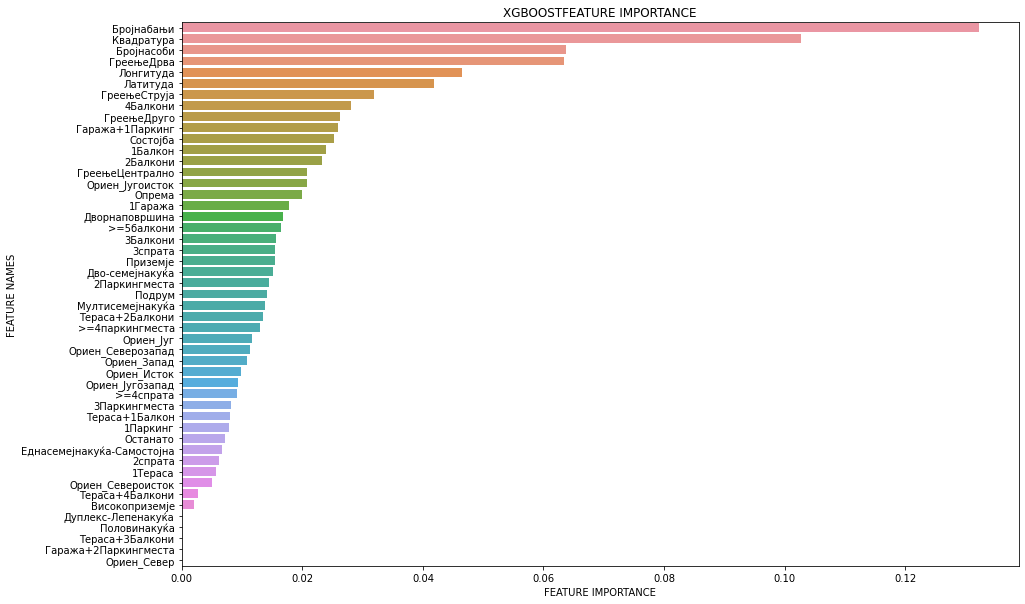

In [ ]:
plot_feature_importance(model.feature_importances_, features, 'XGBOOST')

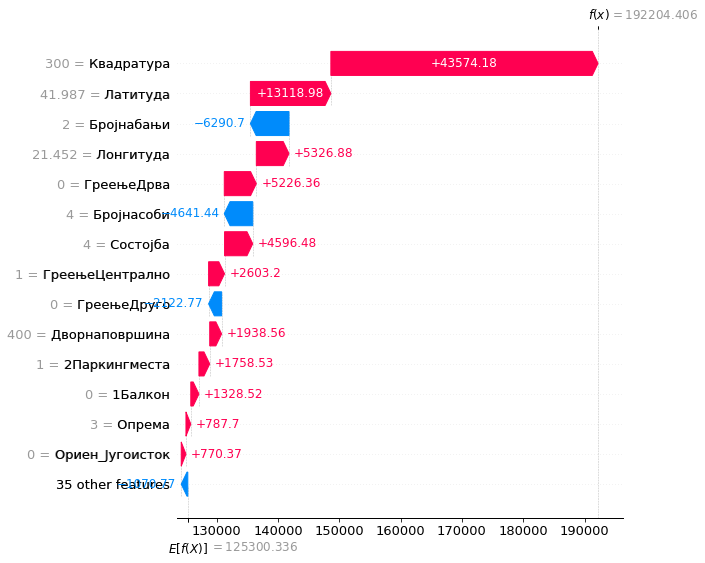

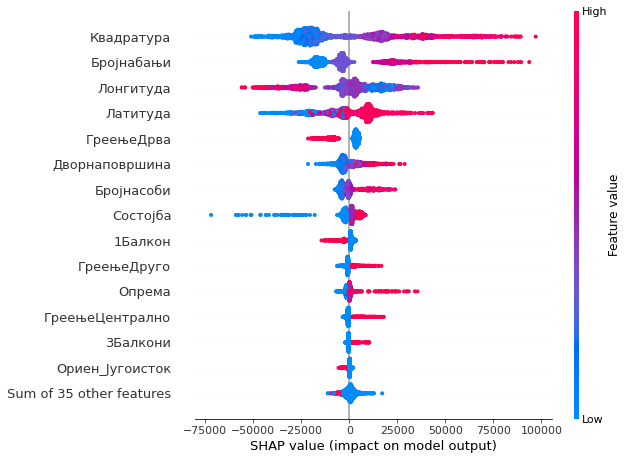

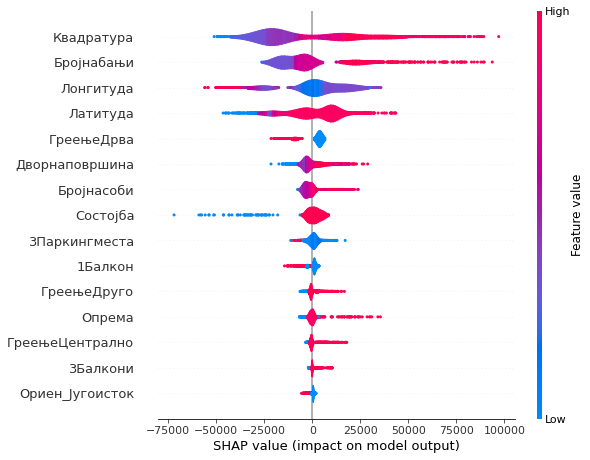

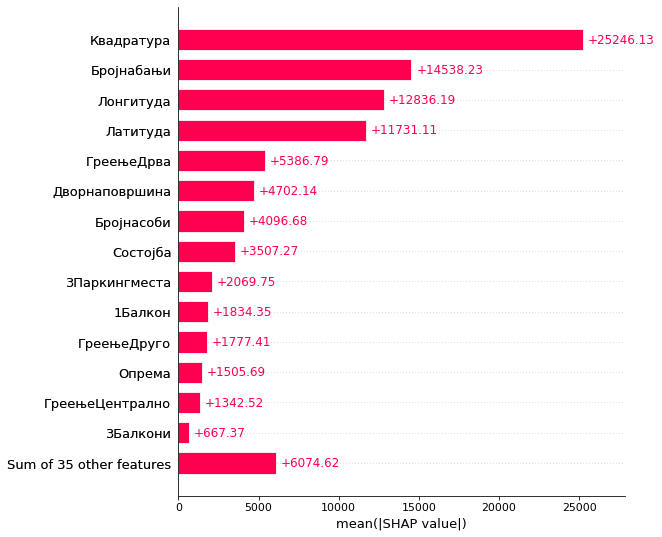

In [ ]:
explainer = shap.Explainer(model)
shap_values = explainer(x)

shap.plots.waterfall(shap_values[0], max_display=15)
shap.plots.beeswarm(shap_values, max_display=15)
shap.summary_plot(shap_values, plot_type='violin', max_display=15)
shap.plots.bar(shap_values, max_display=15)

Model 2
--

<h2>XGBRegressor</h2>

In [ ]:
xgb = XGBRegressor()

gsc = GridSearchCV(
            estimator=xgb,
            param_grid={"learning_rate": (0.03, 0.1, 0.5, 0.10, 0.15),
                        "max_depth": [ 3, 4, 5, 6, 8],
                        "min_child_weight": [ 1, 3, 5, 7, 9],
                        "colsample_bytree":[ 0.3, 0.4, 0.5, 0.6, 0.7],
                        'objective':['reg:squarederror'],
                        'n_estimators': [5, 10, 15, 20, 30, 50],
                        'random_state' : [0]
                        },
            cv=3, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)

gsc.fit(x, y)

print("Best score:", gsc.best_score_)
print("Best estimator:", gsc.best_estimator_)
print("Best parameters:", gsc.best_params_)

Fitting 3 folds for each of 3750 candidates, totalling 11250 fits
Best score: -43351.1093026481
Best estimator: XGBRegressor(colsample_bytree=0.5, learning_rate=0.15, max_depth=6,
             min_child_weight=5, n_estimators=15, objective='reg:squarederror')
Best parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.15, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 15, 'objective': 'reg:squarederror', 'random_state': 0}


In [15]:
model2 = XGBRegressor(objective ='reg:squarederror', 
    colsample_bytree = 0.5, learning_rate = 0.15, min_child_weight=5,
    max_depth = 6, alpha = 2, n_estimators = 15, random_state=0)


model2.fit(X_train, Y_train)
y_pred = model2.predict(X_test)

print("Mean Absolute Error : " + str(np.sqrt(mean_absolute_error(y_pred, Y_test))))
print("Mean Squared Error : " + str(np.sqrt(mean_squared_error(y_pred, Y_test))))
print("Mean Absolute Percentage error: " + str(mean_absolute_percentage_error(Y_test, y_pred)))
print("R2_score:" +str( r2_score(y_pred,Y_test)))

Mean Absolute Error : 207.10671557172776
Mean Squared Error : 64072.215584019235
Mean Absolute Percentage error: 0.38998985317704377
R2_score:-0.38683339388318627


In [16]:
file_name = "/content/drive/MyDrive/xgb_reg2_houses.pkl"

# save
pickle.dump(model2, open(file_name, "wb"))

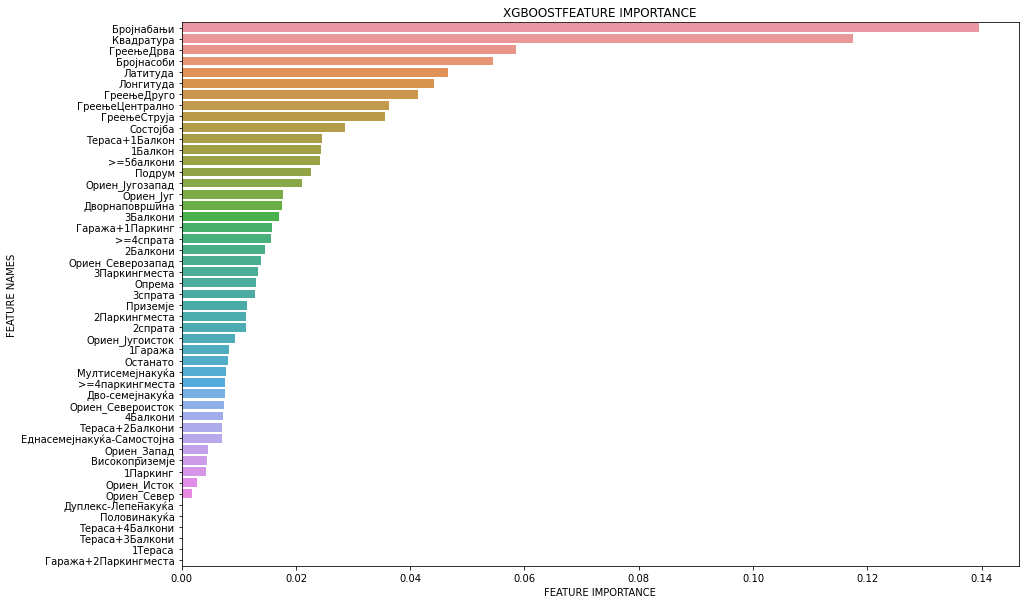

In [ ]:
plot_feature_importance(model2.feature_importances_, features, 'XGBOOST')

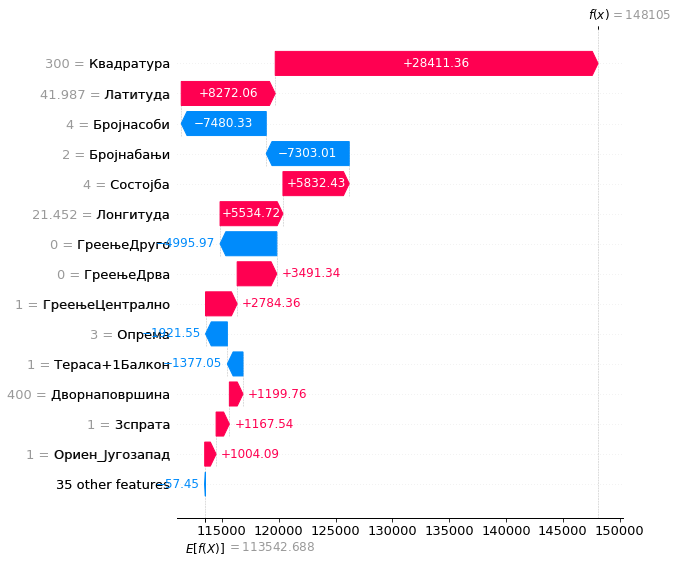

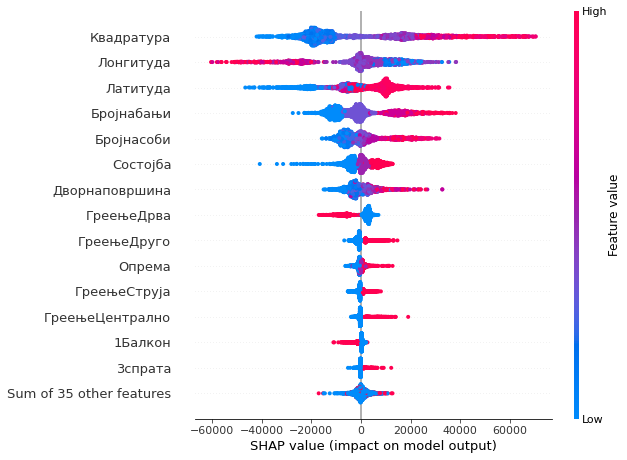

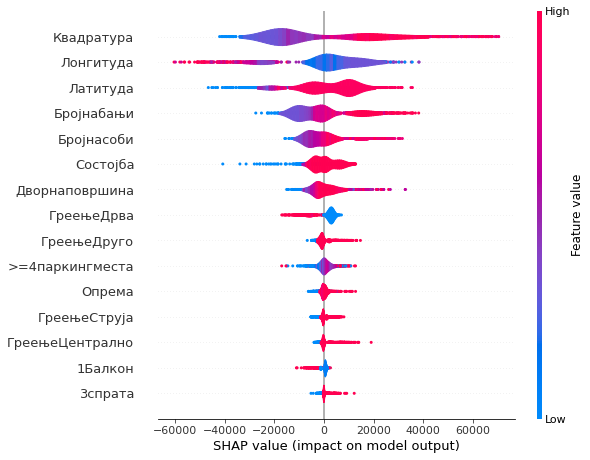

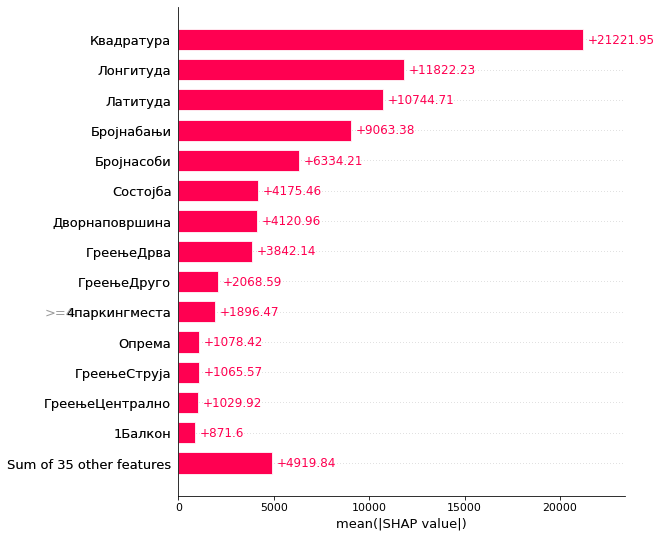

In [ ]:
explainer = shap.Explainer(model2)
shap_values = explainer(x)

shap.plots.waterfall(shap_values[0], max_display=15)
shap.plots.beeswarm(shap_values, max_display=15)
shap.summary_plot(shap_values, plot_type='violin', max_display=15)
shap.plots.bar(shap_values, max_display=15)

Model 3
--

<h2>CatBoostRegressor</h2>

In [ ]:
cbr = CatBoostRegressor()

gsc = GridSearchCV(
            estimator=cbr,
            param_grid={'iterations': [50, 100, 150, 200],
                        'learning_rate': [0.03, 0.1, 0.5, 0.10, 0.15],
                        'depth': [2, 4, 6, 8],
                        'l2_leaf_reg': [0.2, 0.5, 1, 3],
                        'loss_function': ['RMSE', 'MAE'],
                        'random_state' : [0],
                        'verbose': [3]
                        },
            cv=3, scoring='neg_mean_absolute_error', verbose=3, n_jobs=-1)

gsc.fit(x, y)

print("Best score:", gsc.best_score_)
print("Best estimator:", gsc.best_estimator_)
print("Best parameters:", gsc.best_params_)

Fitting 3 folds for each of 640 candidates, totalling 1920 fits
0:	learn: 61188.6594755	total: 47.2ms	remaining: 9.4s
3:	learn: 55479.8679231	total: 50.7ms	remaining: 2.48s
6:	learn: 51602.5221560	total: 53.7ms	remaining: 1.48s
9:	learn: 48971.4592415	total: 56.4ms	remaining: 1.07s
12:	learn: 47172.1848976	total: 59.2ms	remaining: 851ms
15:	learn: 45970.2062768	total: 62ms	remaining: 714ms
18:	learn: 45011.4696949	total: 65ms	remaining: 619ms
21:	learn: 44420.5060286	total: 67.9ms	remaining: 549ms
24:	learn: 43904.5432149	total: 70.8ms	remaining: 496ms
27:	learn: 43156.5941075	total: 73.6ms	remaining: 452ms
30:	learn: 42648.1184236	total: 76.5ms	remaining: 417ms
33:	learn: 42235.8409356	total: 79.4ms	remaining: 388ms
36:	learn: 41937.3598380	total: 82.3ms	remaining: 363ms
39:	learn: 41618.5258608	total: 85.1ms	remaining: 340ms
42:	learn: 41383.3330252	total: 87.9ms	remaining: 321ms
45:	learn: 41189.5965162	total: 90.8ms	remaining: 304ms
48:	learn: 41040.6276611	total: 93.6ms	remaining:

In [17]:
model3 = CatBoostRegressor(iterations=200, l2_leaf_reg=0.2, learning_rate=0.1, 
                           loss_function='MAE', depth=4, random_state=0, verbose=False)

model3.fit(X_train, Y_train)
y_pred = model3.predict(X_test)

print("Mean Absolute Error : " + str(np.sqrt(mean_absolute_error(y_pred, Y_test))))
print("Mean Squared Error : " + str(np.sqrt(mean_squared_error(y_pred, Y_test))))
print("Mean Absolute Percentage error: " + str(mean_absolute_percentage_error(Y_test, y_pred)))
print("R2_score:" +str( r2_score(y_pred,Y_test)))

Mean Absolute Error : 204.533591344252
Mean Squared Error : 62024.363208446695
Mean Absolute Percentage error: 0.36780502104703594
R2_score:-0.08438908012587687


In [18]:
file_name = "/content/drive/MyDrive/cbr_reg_houses.pkl"
# save
pickle.dump(model3, open(file_name, "wb"))

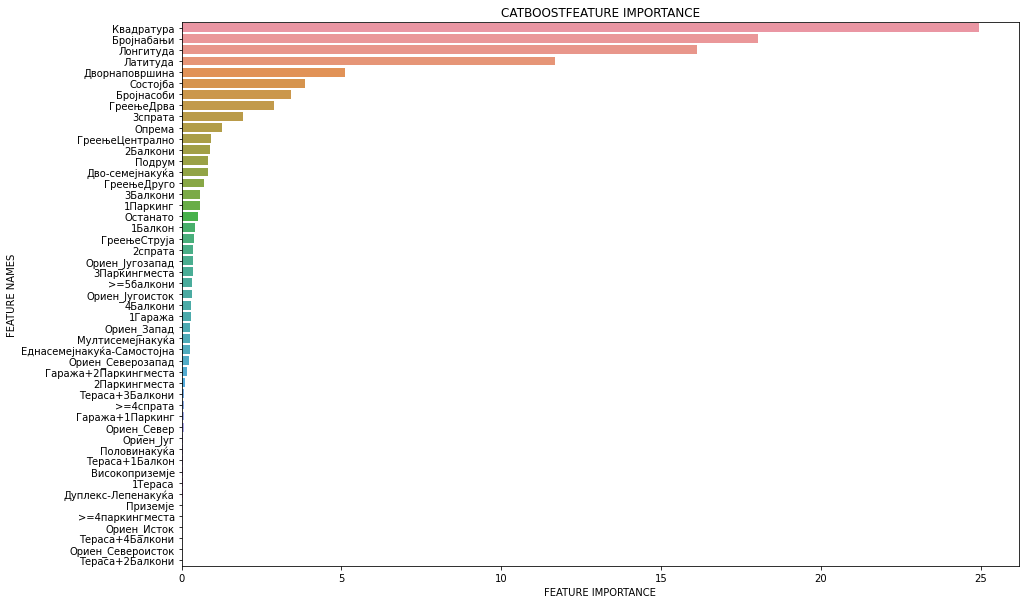

In [ ]:
plot_feature_importance(model3.feature_importances_, model3.feature_names_, 'CATBOOST')

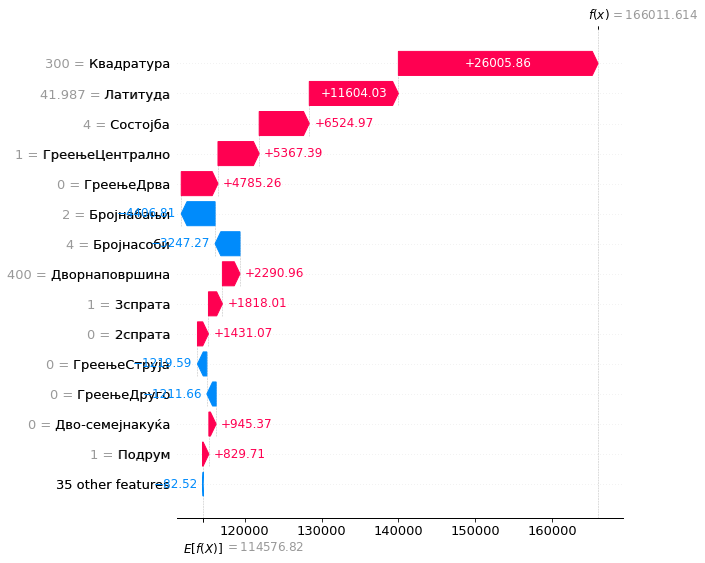

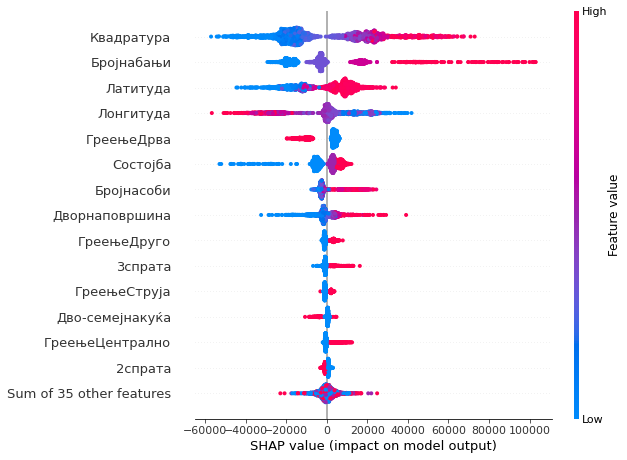

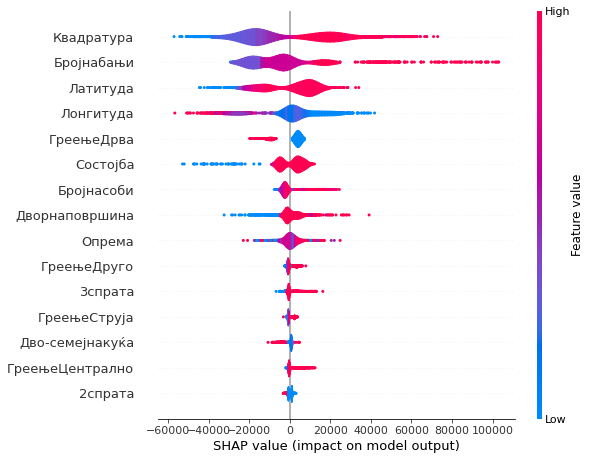

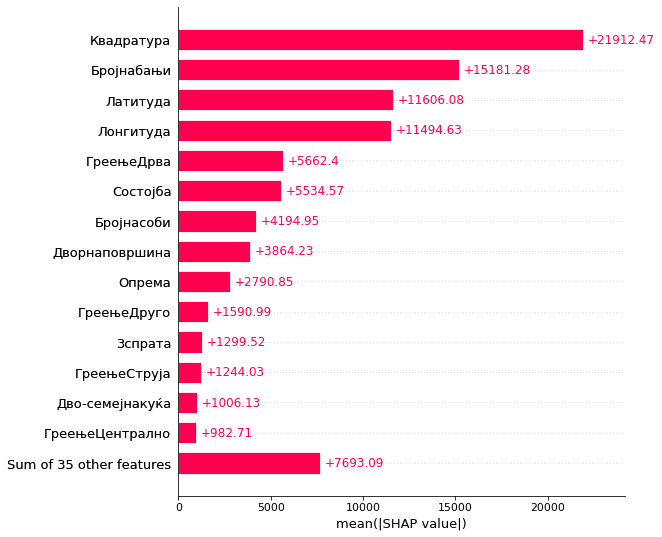

In [ ]:
explainer = shap.Explainer(model3)
shap_values = explainer(x)

shap.plots.waterfall(shap_values[0], max_display=15)
shap.plots.beeswarm(shap_values, max_display=15)
shap.summary_plot(shap_values, plot_type='violin', max_display=15)
shap.plots.bar(shap_values, max_display=15)

Model 4
--

<h2>LGBMRegressor</h2>

In [ ]:
lgbm = LGBMRegressor()

gsc = GridSearchCV(
            estimator=lgbm,
            param_grid={'num_leaves': [7, 14, 21, 28, 31, 50],
                        'learning_rate': [0.03, 0.1, 0.5, 0.10, 0.15],
                        'max_depth': [3, 4, 5, 6, 8],
                        'n_estimators': [50, 100, 150, 200, 500],
                        'random_state' : [0]
                        },
            cv=3, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)

gsc.fit(x, y)

print("Best score:", gsc.best_score_)
print("Best estimator:", gsc.best_estimator_)
print("Best parameters:", gsc.best_params_)

Fitting 3 folds for each of 750 candidates, totalling 2250 fits
Best score: -43942.459435709425
Best estimator: LGBMRegressor(learning_rate=0.03, max_depth=6, n_estimators=150, num_leaves=50,
              random_state=0)
Best parameters: {'learning_rate': 0.03, 'max_depth': 6, 'n_estimators': 150, 'num_leaves': 50, 'random_state': 0}


In [19]:
model4 = LGBMRegressor(learning_rate=0.03, max_depth=6, n_estimators=150,
                       num_leaves=50, random_state=0)

model4.fit(X_train, Y_train)
y_pred = model4.predict(X_test)

print("Mean Absolute Error : " + str(np.sqrt(mean_absolute_error(y_pred, Y_test))))
print("Mean Squared Error : " + str(np.sqrt(mean_squared_error(y_pred, Y_test))))
print("Mean Absolute Percentage error: " + str(mean_absolute_percentage_error(Y_test, y_pred)))
print("R2_score:" +str( r2_score(y_pred,Y_test)))

Mean Absolute Error : 206.68430545576228
Mean Squared Error : 61932.975655449285
Mean Absolute Percentage error: 0.42375481528976594
R2_score:0.12832215554912008


In [20]:
file_name = "/content/drive/MyDrive/lgbm_reg_houses.pkl"
# save
pickle.dump(model4, open(file_name, "wb"))

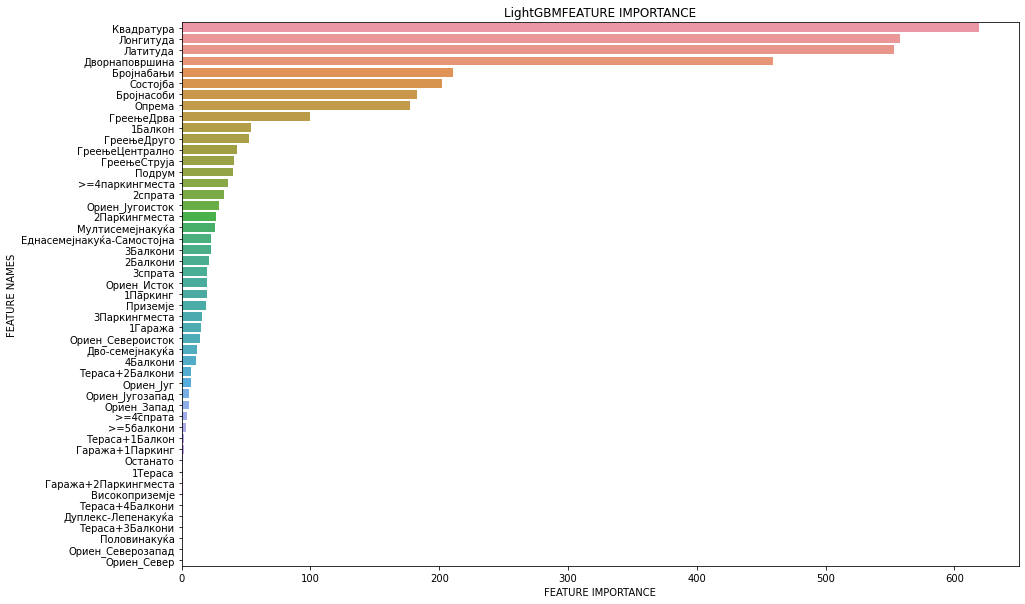

In [ ]:
plot_feature_importance(model4.feature_importances_, features, 'LightGBM')

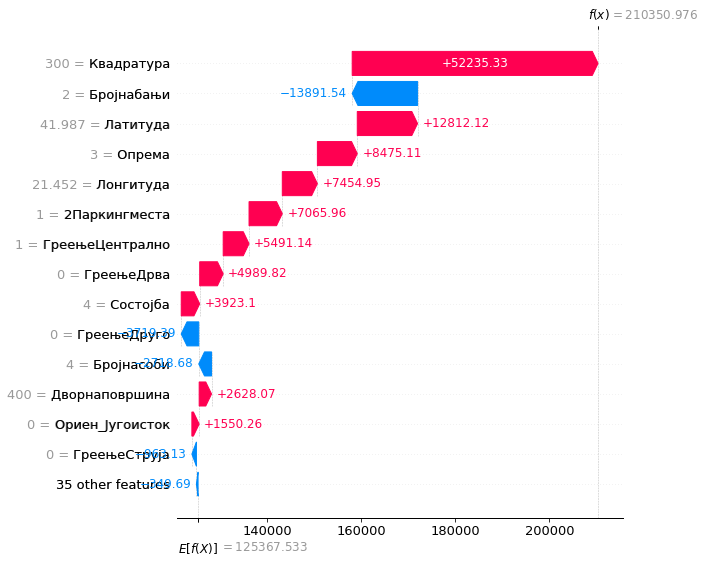

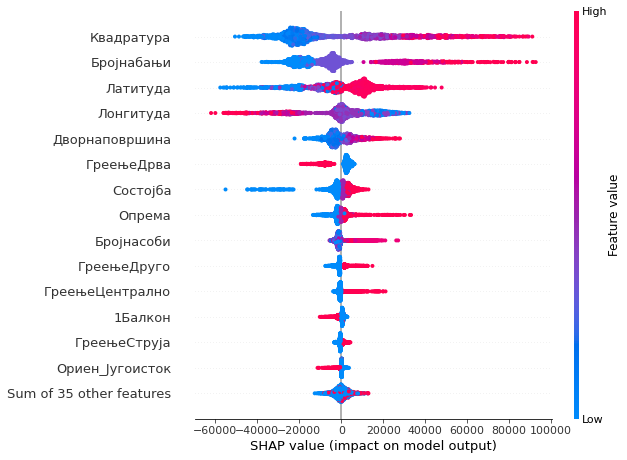

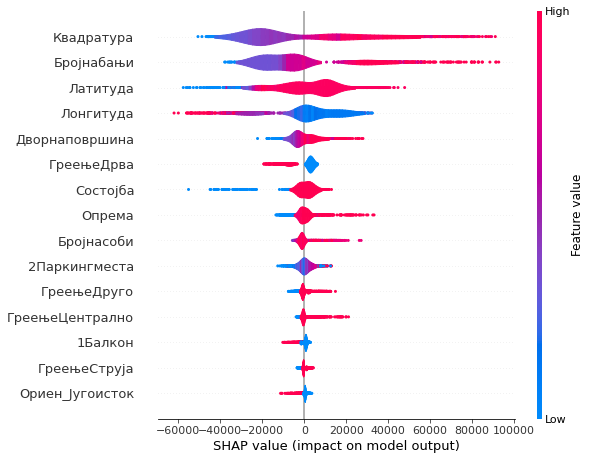

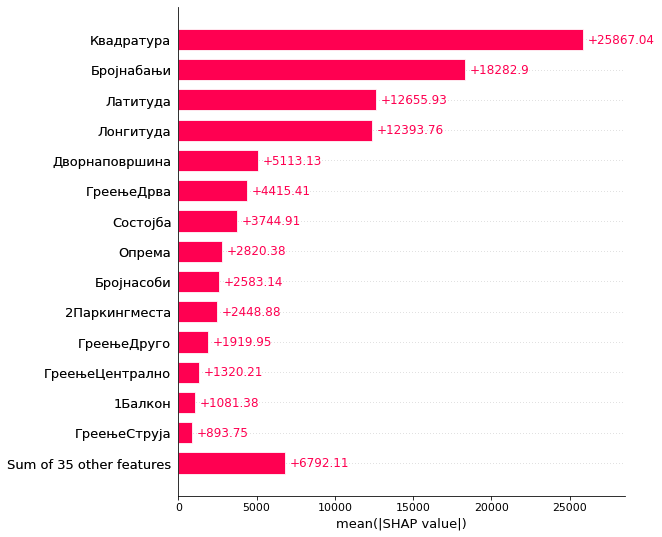

In [ ]:
explainer = shap.Explainer(model4)
shap_values = explainer(x)

shap.plots.waterfall(shap_values[0], max_display=15)
shap.plots.beeswarm(shap_values, max_display=15)
shap.summary_plot(shap_values, plot_type='violin', max_display=15)
shap.plots.bar(shap_values, max_display=15)

SUMMARY
--

In [ ]:
from sklearn import metrics
algorithms = []

algorithms.append(XGBRegressor(objective ='reg:squarederror', 
    colsample_bytree = 0.5, learning_rate = 0.05, min_child_weight=7,
    max_depth = 4, alpha = 2, n_estimators = 150, random_state=0))

algorithms.append(XGBRegressor(objective ='reg:squarederror', 
    colsample_bytree = 0.5, learning_rate = 0.15, min_child_weight=5,
    max_depth = 6, alpha = 2, n_estimators = 15, random_state=0))

algorithms.append(CatBoostRegressor(iterations=200, l2_leaf_reg=0.2, learning_rate=0.1, 
                           loss_function='MAE', depth=4, random_state=0, verbose=False))

algorithms.append(LGBMRegressor(learning_rate=0.03, max_depth=6, n_estimators=150,
                       num_leaves=50, random_state=0))

data = []

for algo in algorithms:

  algo.fit(X_train, Y_train)

  y_pred = algo.predict(X_test)

  data.append(({
        'Mean Absolute Error': np.sqrt(metrics.mean_absolute_error(y_pred, Y_test)),
        'Mean Absolute Percentage Error': metrics.mean_absolute_percentage_error(y_pred, Y_test),
        'R2 score': metrics.r2_score(y_pred, Y_test),
        'Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_pred, Y_test))
        }))
  

results = pd.DataFrame(data=data, columns=['Mean Absolute Error', 'Mean Absolute Percentage Error', 'R2 score',
                                           'Mean Squared Error'],
                       index=['XGBRegressor1', 'XGBRegressor2', 
                              'CatBoostRegressor', 'LGBMRegressor'])

results

Mean Absolute Error  Mean Absolute Percentage Error  \
XGBRegressor1               205.933984                        0.337389   
XGBRegressor2               207.106716                        0.367355   
CatBoostRegressor           204.533591                        0.364699   
LGBMRegressor               206.684305                        0.340095   

                   R2 score  Mean Squared Error  
XGBRegressor1      0.143893        60684.614376  
XGBRegressor2     -0.386833        64072.215584  
CatBoostRegressor -0.084389        62024.363208  
LGBMRegressor      0.128322        61932.975655

Најдобри перформанси за податоците енкодирани со различни техники за различни карактериситики но без логаритамска трансформација има CatBoostRegressor моделот со средна апсолутна грешка од 204.53

Со логаритамска трансформација на дворната површина, квадратурата и цената
--

In [ ]:
features = transf_diffenc_houses.columns.tolist()
features.remove('Цена')
features

['Латитуда',
 'Лонгитуда',
 'Бројнасоби',
 'Квадратура',
 'Дворнаповршина',
 'Состојба',
 'Опрема',
 'Бројнабањи',
 'Подрум',
 'Ориен_Југ',
 'Ориен_Југозапад',
 'Ориен_Југоисток',
 'Ориен_Запад',
 'Ориен_Исток',
 'Ориен_Север',
 'Ориен_Северозапад',
 'Ориен_Североисток',
 '1Гаража',
 '1Паркинг',
 '2Паркингместа',
 '3Паркингместа',
 '>=4паркингместа',
 'Гаража+1Паркинг',
 'Гаража+2Паркингместа',
 '1Балкон',
 '1Тераса',
 '2Балкони',
 '3Балкони',
 '4Балкони',
 '>=5балкони',
 'Тераса+1Балкон',
 'Тераса+2Балкони',
 'Тераса+3Балкони',
 'Тераса+4Балкони',
 'Двo-семејнакуќа',
 'Дуплекс-Лепенакуќа',
 'Еднасемејнакуќа-Самостојна',
 'Мултисемејнакуќа',
 'Останато',
 'Половинакуќа',
 '2спрата',
 '3спрата',
 '>=4спрата',
 'Високоприземје',
 'Приземје',
 'ГреењеДрва',
 'ГреењеДруго',
 'ГреењеСтруја',
 'ГреењеЦентрално']

In [21]:
x = transf_diffenc_houses.loc[:, transf_diffenc_houses.columns != 'Цена']
y = transf_diffenc_houses['Цена']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Model 5
--

<h2>XGBRegressor</h2>

In [ ]:
xgb = XGBRegressor()

gsc = GridSearchCV(
            estimator=xgb,
            param_grid={"learning_rate": (0.03, 0.05, 0.10, 0.15, 0.18),
                        "max_depth": [ 4, 5, 6, 7, 8],
                        "min_child_weight": [ 1, 3, 5, 6, 7],
                        "colsample_bytree":[ 0.3, 0.4, 0.5, 0.6, 0.7],
                        'objective':['reg:squarederror'],
                        'n_estimators': [10, 15, 20, 25, 50],
                        'random_state' : [0]
                        },
            cv=3, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)

gsc.fit(x, y)

print("Best score:", gsc.best_score_)
print("Best estimator:", gsc.best_estimator_)
print("Best parameters:", gsc.best_params_)

Fitting 3 folds for each of 3125 candidates, totalling 9375 fits
Best score: -0.3397552115194527
Best estimator: XGBRegressor(colsample_bytree=0.6, learning_rate=0.15, max_depth=4,
             n_estimators=50, objective='reg:squarederror')
Best parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.15, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 50, 'objective': 'reg:squarederror', 'random_state': 0}


In [22]:
model5 = XGBRegressor(objective ='reg:squarederror', 
    colsample_bytree = 0.6, learning_rate = 0.15, min_child_weight=1,
    max_depth = 4, n_estimators = 50, random_state=0)


model5.fit(X_train, Y_train)
y_pred = model5.predict(X_test)

print("Mean Absolute Error : " + str(np.sqrt(mean_absolute_error(y_pred, Y_test))))
print("Mean Squared Error : " + str(np.sqrt(mean_squared_error(y_pred, Y_test))))
print("Mean Absolute Percentage error: " + str(mean_absolute_percentage_error(Y_test, y_pred)))
print("R2_score:" +str( r2_score(y_pred,Y_test)))

Mean Absolute Error : 0.5874160478121968
Mean Squared Error : 0.43567194323980196
Mean Absolute Percentage error: 0.0300405975072796
R2_score:0.2520578436282108


In [23]:
file_name = "/content/drive/MyDrive/xgb_reg5_houses_onehotenc.pkl"

# save
pickle.dump(model5, open(file_name, "wb"))

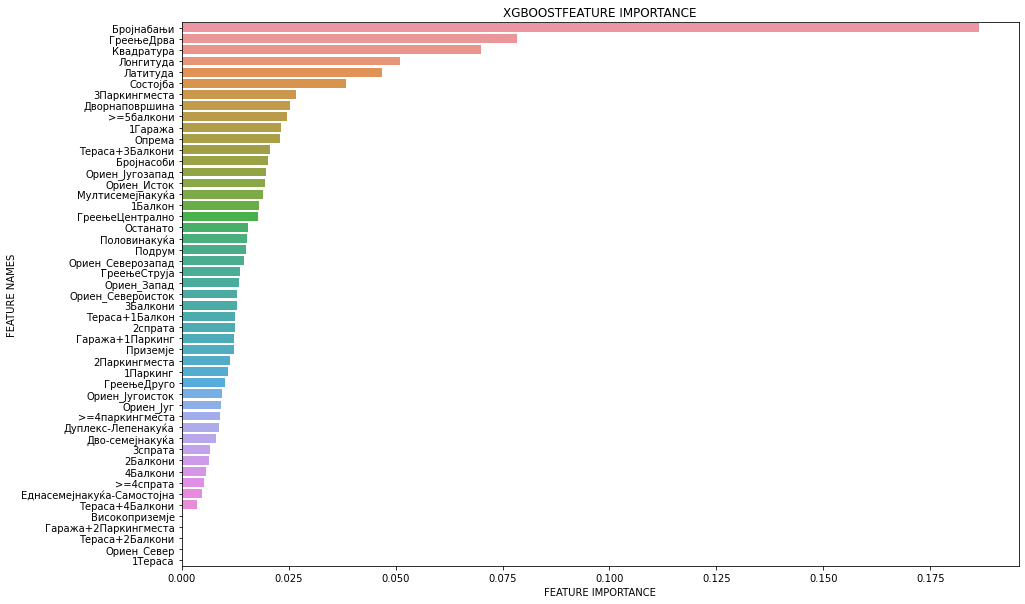

In [ ]:
plot_feature_importance(model5.feature_importances_, features, 'XGBOOST')

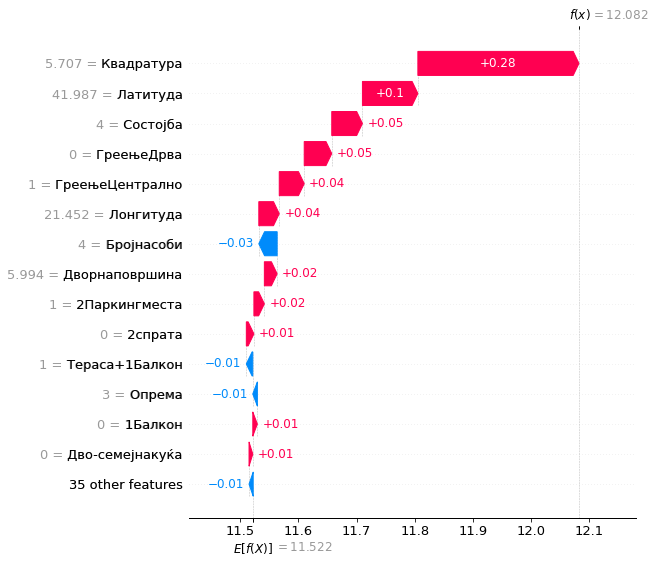

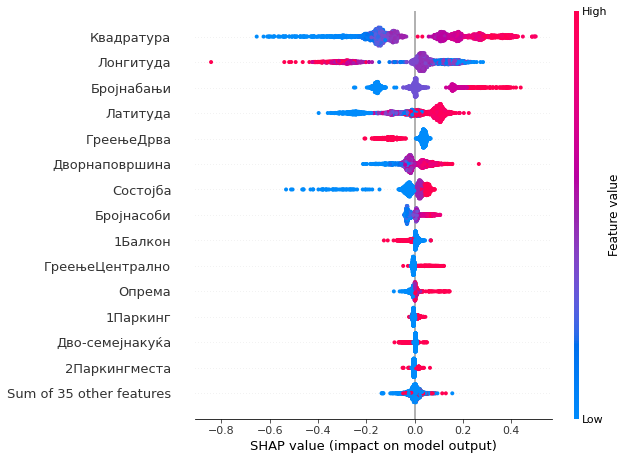

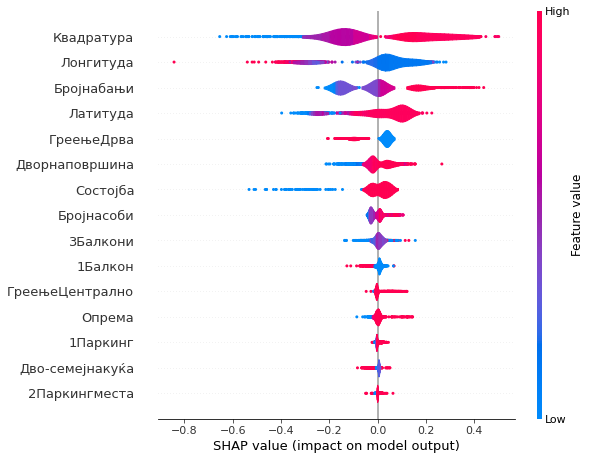

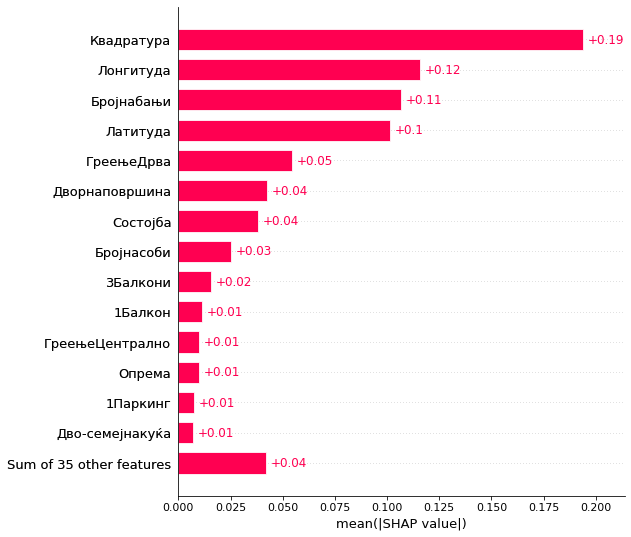

In [ ]:
explainer = shap.Explainer(model5)
shap_values = explainer(x)

shap.plots.waterfall(shap_values[0], max_display=15)
shap.plots.beeswarm(shap_values, max_display=15)
shap.summary_plot(shap_values, plot_type='violin', max_display=15)
shap.plots.bar(shap_values, max_display=15)

Model 6
--

<h2>XGBRegressor</h2>

In [ ]:
xgb = XGBRegressor()

gsc = GridSearchCV(
            estimator=xgb,
            param_grid={"learning_rate": (0.18, 0.20, 0.21, 0.25, 0.30),
                        "max_depth": [ 2, 3, 4, 5, 6, 7],
                        "min_child_weight": [ 1, 3, 5, 7],
                        "colsample_bytree":[ 0.3, 0.4, 0.5, 0.6, 0.7],
                        'objective':['reg:squarederror'],
                        'n_estimators': [10, 15, 20, 25, 30, 50, 100],
                        'random_state' : [0]
                        },
            cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

gsc.fit(x, y)

print("Best score:", gsc.best_score_)
print("Best estimator:", gsc.best_estimator_)
print("Best parameters:", gsc.best_params_)

Fitting 3 folds for each of 4200 candidates, totalling 12600 fits
Best score: -0.18850361175624367
Best estimator: XGBRegressor(colsample_bytree=0.3, learning_rate=0.18, min_child_weight=7,
             n_estimators=50, objective='reg:squarederror')
Best parameters: {'colsample_bytree': 0.3, 'learning_rate': 0.18, 'max_depth': 3, 'min_child_weight': 7, 'n_estimators': 50, 'objective': 'reg:squarederror', 'random_state': 0}


In [24]:
model6 = XGBRegressor(objective ='reg:squarederror', 
    colsample_bytree = 0.3, learning_rate = 0.18, min_child_weight=7,
    max_depth = 3, alpha = 2, n_estimators = 50, random_state=0)


model6.fit(X_train, Y_train)
y_pred = model6.predict(X_test)

print("Mean Absolute Error : " + str(np.sqrt(mean_absolute_error(y_pred, Y_test))))
print("Mean Squared Error : " + str(np.sqrt(mean_squared_error(y_pred, Y_test))))
print("Mean Absolute Percentage error: " + str(mean_absolute_percentage_error(y_pred, Y_test)))
print("R2_score:" +str( r2_score(y_pred,Y_test)))

Mean Absolute Error : 0.592242790795247
Mean Squared Error : 0.43878362952062994
Mean Absolute Percentage error: 0.030436155187256262
R2_score:0.19242549297462797


In [27]:
file_name = "/content/drive/MyDrive/xgb_reg6_houses.pkl"
# save
pickle.dump(model6, open(file_name, "wb"))

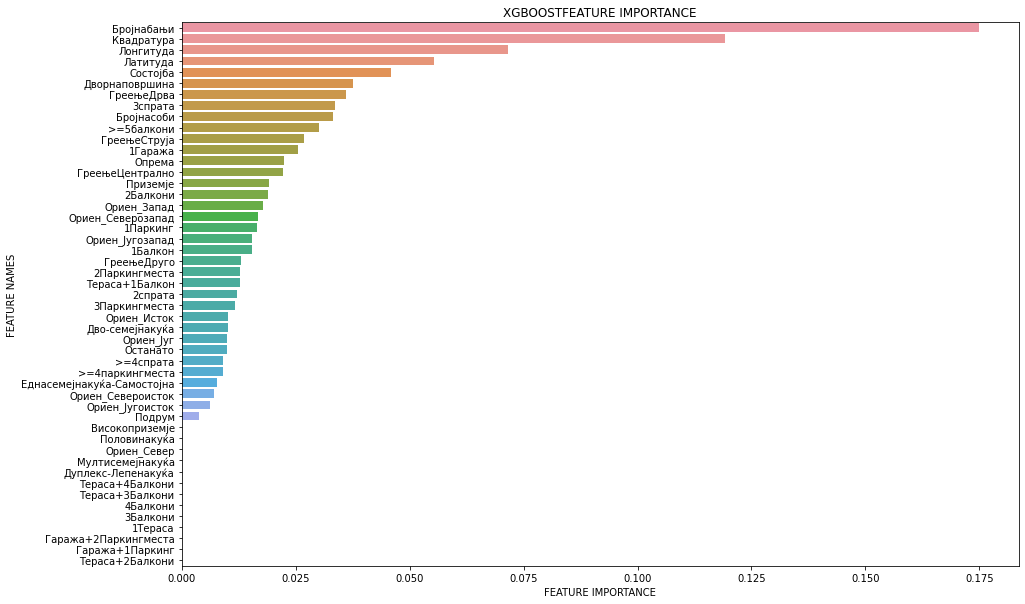

In [ ]:
plot_feature_importance(model6.feature_importances_, features, 'XGBOOST')

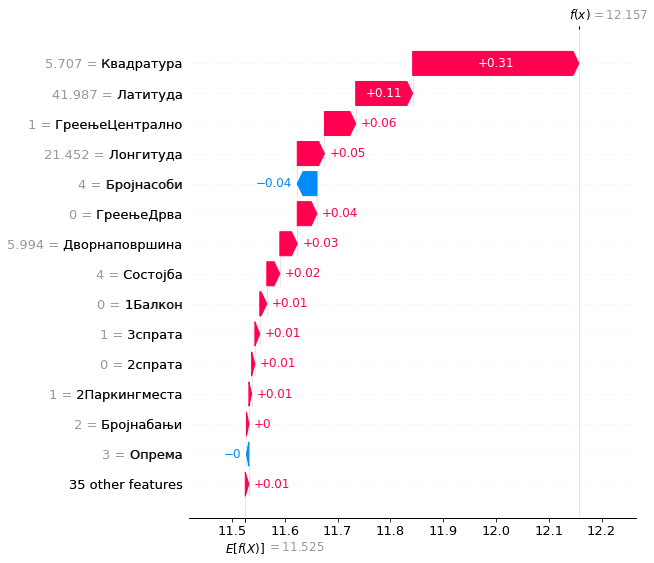

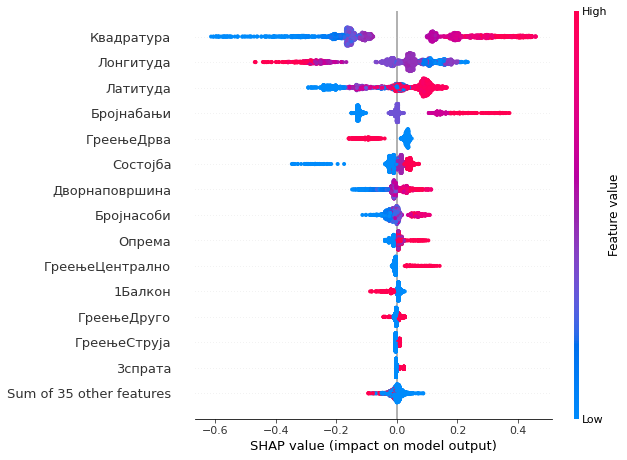

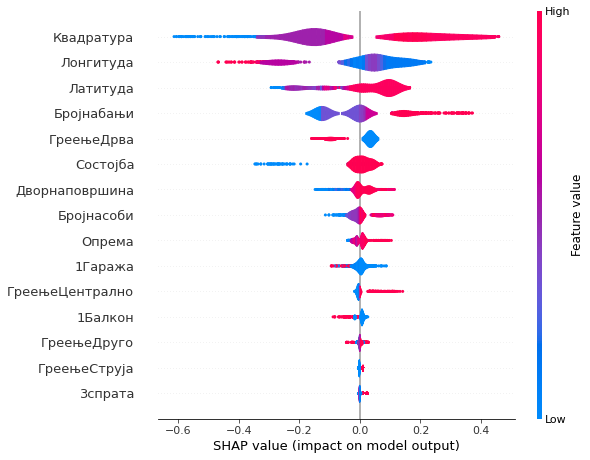

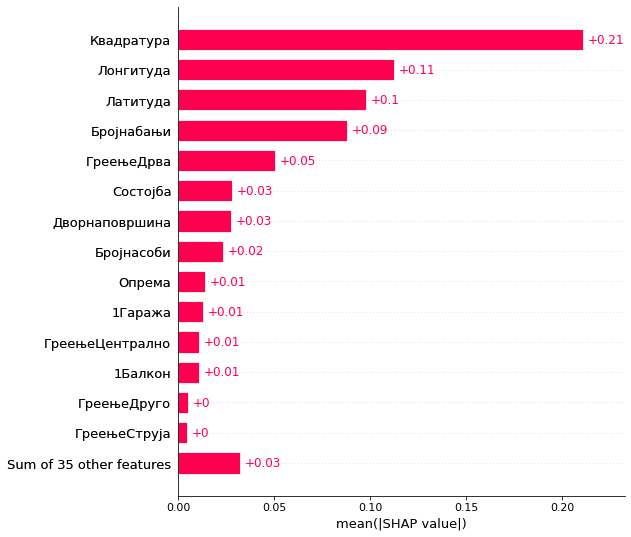

In [ ]:
explainer = shap.Explainer(model6)
shap_values = explainer(x)

shap.plots.waterfall(shap_values[0], max_display=15)
shap.plots.beeswarm(shap_values, max_display=15)
shap.summary_plot(shap_values, plot_type='violin', max_display=15)
shap.plots.bar(shap_values, max_display=15)

Model 7
--

<h2>CatBoostRegressor</h2>

In [ ]:
cbr = CatBoostRegressor()

gsc = GridSearchCV(
            estimator=cbr,
            param_grid={'iterations': [50, 100, 150, 200],
                        'learning_rate': [0.03, 0.1, 0.5, 0.10, 0.15],
                        'depth': [2, 4, 6, 8],
                        'l2_leaf_reg': [0.2, 0.5, 1, 3],
                        'loss_function': ['RMSE', 'MAE'],
                        'random_state' : [0],
                        'verbose': [3]
                        },
            cv=3, scoring='neg_mean_absolute_error', verbose=3, n_jobs=-1)

gsc.fit(x, y)

print("Best score:", gsc.best_score_)
print("Best estimator:", gsc.best_estimator_)
print("Best parameters:", gsc.best_params_)

Fitting 3 folds for each of 640 candidates, totalling 1920 fits
0:	learn: 0.5207241	total: 1.1ms	remaining: 220ms
3:	learn: 0.4695309	total: 5.14ms	remaining: 252ms
6:	learn: 0.4310329	total: 8.14ms	remaining: 224ms
9:	learn: 0.4050837	total: 11.1ms	remaining: 211ms
12:	learn: 0.3888027	total: 14ms	remaining: 201ms
15:	learn: 0.3773288	total: 16.5ms	remaining: 189ms
18:	learn: 0.3674517	total: 19.3ms	remaining: 184ms
21:	learn: 0.3604266	total: 22.5ms	remaining: 182ms
24:	learn: 0.3548506	total: 25.4ms	remaining: 178ms
27:	learn: 0.3492361	total: 28.2ms	remaining: 173ms
30:	learn: 0.3455335	total: 31.1ms	remaining: 170ms
33:	learn: 0.3424386	total: 33.9ms	remaining: 166ms
36:	learn: 0.3395253	total: 36.8ms	remaining: 162ms
39:	learn: 0.3367672	total: 39.7ms	remaining: 159ms
42:	learn: 0.3351075	total: 42.5ms	remaining: 155ms
45:	learn: 0.3331855	total: 45.3ms	remaining: 152ms
48:	learn: 0.3317050	total: 48.3ms	remaining: 149ms
51:	learn: 0.3300729	total: 51.2ms	remaining: 146ms
54:	lea

In [26]:
model7 = CatBoostRegressor(iterations=200, l2_leaf_reg=1, learning_rate=0.1, 
                           loss_function='MAE', depth=4, random_state=0, verbose=False)

model7.fit(X_train, Y_train)
y_pred = model7.predict(X_test)

print("Mean Absolute Error : " + str(np.sqrt(mean_absolute_error(y_pred, Y_test))))
print("Mean Squared Error : " + str(np.sqrt(mean_squared_error(y_pred, Y_test))))
print("Mean Absolute Percentage error: " + str(mean_absolute_percentage_error(Y_test, y_pred)))
print("R2_score:" +str( r2_score(y_pred,Y_test)))

Mean Absolute Error : 0.5923651652577682
Mean Squared Error : 0.441964299757824
Mean Absolute Percentage error: 0.03052106621539789
R2_score:0.29422791559036165


In [28]:
file_name = "/content/drive/MyDrive/cbr_reg7_houses.pkl"
# save
pickle.dump(model7, open(file_name, "wb"))

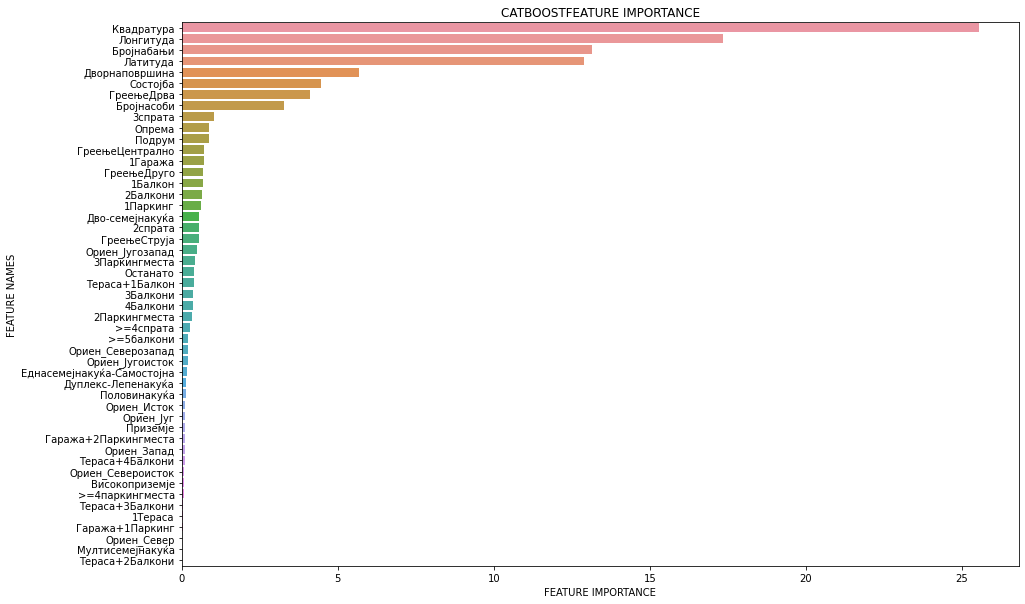

In [ ]:
plot_feature_importance(model7.feature_importances_, model7.feature_names_, 'CATBOOST')

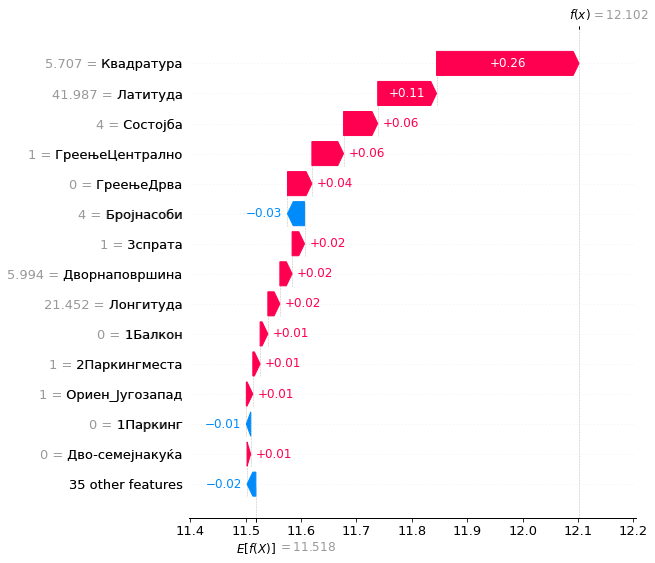

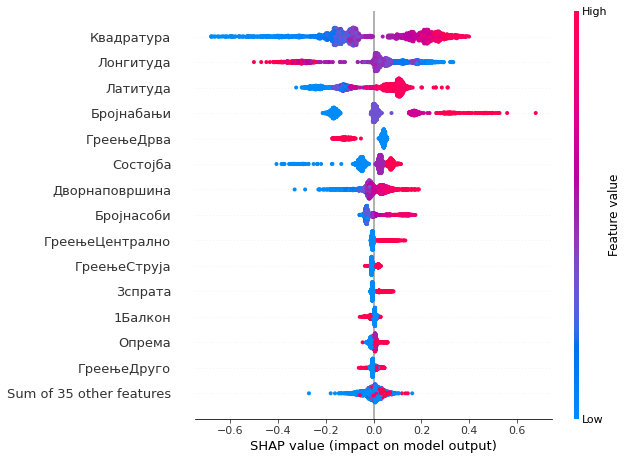

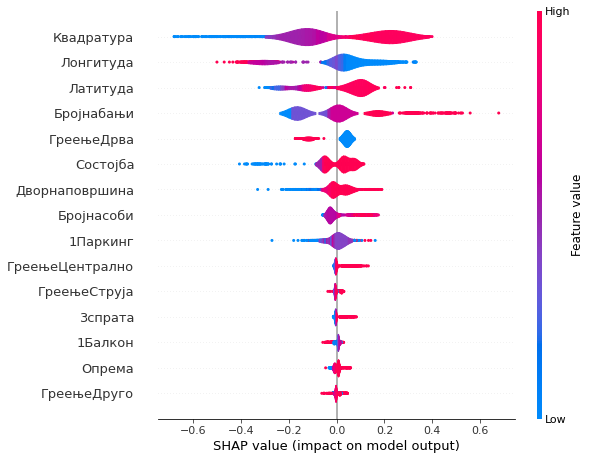

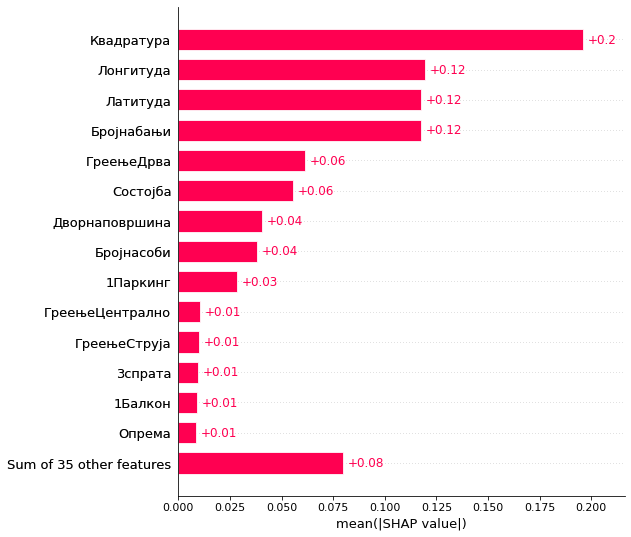

In [ ]:
explainer = shap.Explainer(model7)
shap_values = explainer(x)

shap.plots.waterfall(shap_values[0], max_display=15)
shap.plots.beeswarm(shap_values, max_display=15)
shap.summary_plot(shap_values, plot_type='violin', max_display=15)
shap.plots.bar(shap_values, max_display=15)

Model 8
--

<h2>LGBMRegressor</h2>

In [ ]:
lgbm = LGBMRegressor()

gsc = GridSearchCV(
            estimator=lgbm,
            param_grid={'num_leaves': [14, 21, 28, 31, 50, 60],
                        'learning_rate': [0.03, 0.05, 0.1, 0.15, 0.2],
                        'max_depth': [3, 4, 5, 6, 7, 8],
                        'n_estimators': [50, 100, 150, 200, 250],
                        'random_state' : [0]
                        },
            cv=3, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)

gsc.fit(x, y)

print("Best score:", gsc.best_score_)
print("Best estimator:", gsc.best_estimator_)
print("Best parameters:", gsc.best_params_)

Fitting 3 folds for each of 900 candidates, totalling 2700 fits
Best score: -0.34221154282813265
Best estimator: LGBMRegressor(learning_rate=0.03, max_depth=8, n_estimators=250, num_leaves=14,
              random_state=0)
Best parameters: {'learning_rate': 0.03, 'max_depth': 8, 'n_estimators': 250, 'num_leaves': 14, 'random_state': 0}


In [29]:
model8 = LGBMRegressor(learning_rate=0.03, max_depth=8, n_estimators=250,
                       num_leaves=14, random_state=0)

model8.fit(X_train, Y_train)
y_pred = model8.predict(X_test)

print("Mean Absolute Error : " + str(np.sqrt(mean_absolute_error(y_pred, Y_test))))
print("Mean Squared Error : " + str(np.sqrt(mean_squared_error(y_pred, Y_test))))
print("Mean Absolute Percentage error: " + str(mean_absolute_percentage_error(Y_test, y_pred)))
print("R2_score:" +str( r2_score(y_pred,Y_test)))

Mean Absolute Error : 0.5875798041724427
Mean Squared Error : 0.43805417769462457
Mean Absolute Percentage error: 0.030075072216095563
R2_score:0.2533849639661806


In [30]:
file_name = "/content/drive/MyDrive/lgbm_reg_houses_log.pkl"
# save
pickle.dump(model8, open(file_name, "wb"))

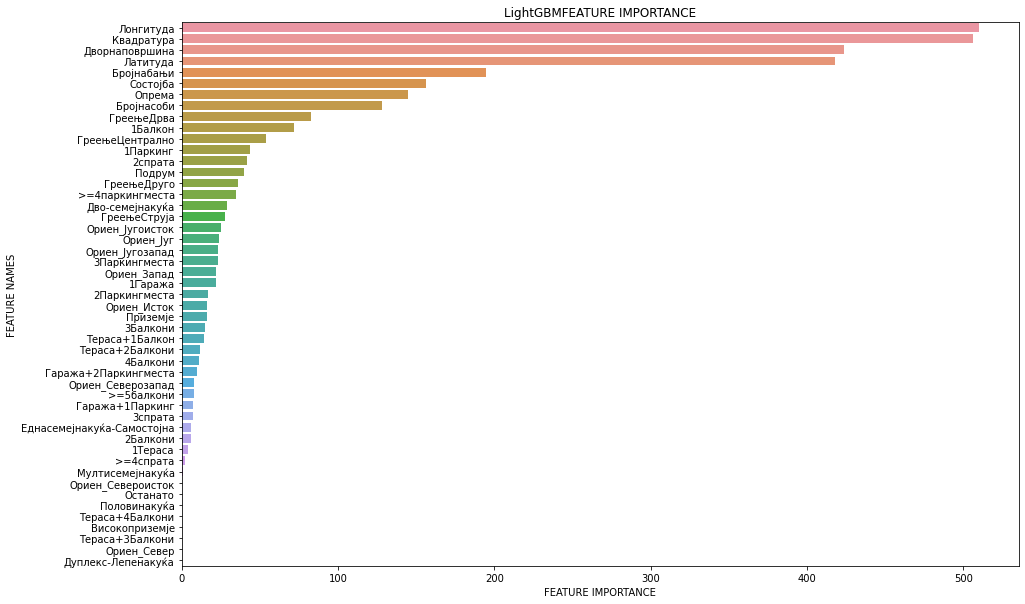

In [ ]:
plot_feature_importance(model8.feature_importances_, features, 'LightGBM')

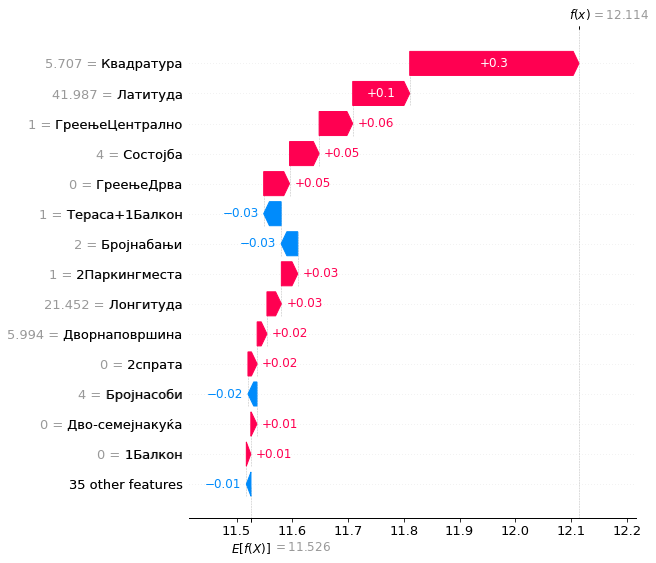

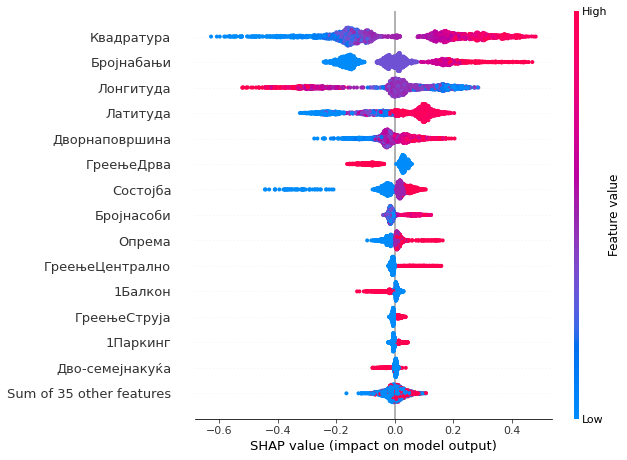

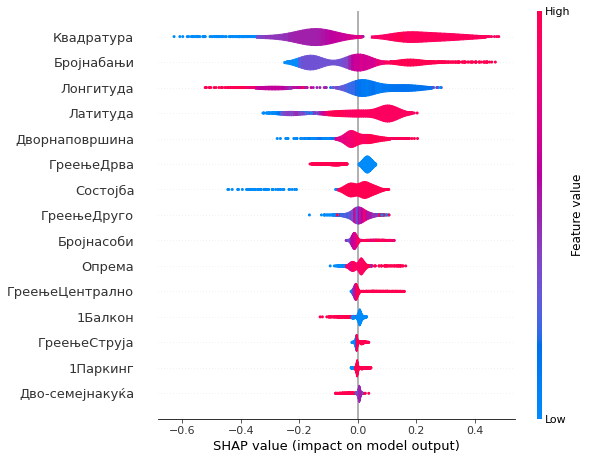

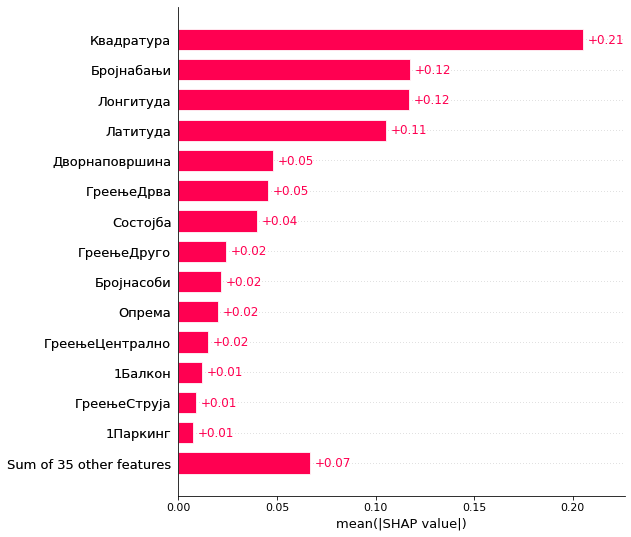

In [ ]:
explainer = shap.Explainer(model8)
shap_values = explainer(x)

shap.plots.waterfall(shap_values[0], max_display=15)
shap.plots.beeswarm(shap_values, max_display=15)
shap.summary_plot(shap_values, plot_type='violin', max_display=15)
shap.plots.bar(shap_values, max_display=15)

SUMMARY
--

In [ ]:
from sklearn import metrics
algorithms = []

algorithms.append(XGBRegressor(objective ='reg:squarederror', 
    colsample_bytree = 0.6, learning_rate = 0.15, min_child_weight=1,
    max_depth = 4, alpha = 2, n_estimators = 50, random_state=0))

algorithms.append(XGBRegressor(objective ='reg:squarederror', 
    colsample_bytree = 0.3, learning_rate = 0.18, min_child_weight=7,
    max_depth = 3, alpha = 2, n_estimators = 50, random_state=0))

algorithms.append(CatBoostRegressor(iterations=200, l2_leaf_reg=1, learning_rate=0.1, 
                           loss_function='MAE', depth=4, random_state=0, verbose=False))

algorithms.append(LGBMRegressor(learning_rate=0.03, max_depth=8, n_estimators=250,
                       num_leaves=14, random_state=0))

data = []

for algo in algorithms:

  algo.fit(X_train, Y_train)

  y_pred = algo.predict(X_test)

  data.append(({
        'Mean Absolute Error': np.sqrt(metrics.mean_absolute_error(y_pred, Y_test)),
        'Mean Absolute Percentage Error': metrics.mean_absolute_percentage_error(y_pred, Y_test),
        'R2 score': metrics.r2_score(y_pred, Y_test),
        'Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_pred, Y_test))
        }))
  

results = pd.DataFrame(data=data, columns=['Mean Absolute Error', 'Mean Absolute Percentage Error', 'R2 score',
                                           'Mean Squared Error'],
                       index=['XGBRegressor1', 'XGBRegressor2', 
                              'CatBoostRegressor', 'LGBMRegressor'])

results

Mean Absolute Error  Mean Absolute Percentage Error  \
XGBRegressor1                 0.587416                        0.029940   
XGBRegressor2                 0.592243                        0.030436   
CatBoostRegressor             0.592365                        0.030439   
LGBMRegressor                 0.587580                        0.029945   

                   R2 score  Mean Squared Error  
XGBRegressor1      0.252058            0.435672  
XGBRegressor2      0.192425            0.438784  
CatBoostRegressor  0.294228            0.441964  
LGBMRegressor      0.253385            0.438054

Најдобри перформанси за податоците енкодирани со различни техники за различни карактериситики со логаритамска трансформација имаат моделите XGBRegressor1 и LGBMRegressor.

Исто така, моделите 9 и 10 имаат слични резултати за кумулативната средна апсолутна грешка, односно 0.5806144442642727 и 0.5874810940790962.

Од резултатите на моделите може да видиме дека моделите над податоците со логаритамска трансформација на дворната површина, квадратура и цена имаат многу подобри перформанси од моделите без логаритамска трансформација.

Model 9
--

<h2>XGBRegressor + KFold + RandomizedSearch</h2>

In [ ]:
y = transf_diffenc_houses['Цена']

In [ ]:
cross_val_score(model, x, y, cv=LeaveOneOut(), scoring='neg_mean_absolute_error', n_jobs=-1)

array([-0.12606459, -0.18201115, -0.03100249, ..., -0.12711666,
       -0.6507874 , -0.29563909])

In [ ]:
cross_val_score(model, x, y, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2).mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished


-0.34162073316030855

Обука на xgboost регресор со 5-кратна вкрстена валидација за оптимизирање на негативната просечна апсолутна грешка користејќи рандомизирано пребарување за оптимизација на хиперпараметри.

In [ ]:
xgb = XGBRegressor()

param_dist = {"learning_rate": (0.05, 0.10, 0.15, 0.20, 0.25, 0.30),
                        "max_depth": [ 3, 4, 5, 6, 8],
                        "min_child_weight": [ 1, 3, 5, 7],
                        "gamma":[ 0.0, 0.1, 0.2],
                        "colsample_bytree":[ 0.3, 0.4, 0.5, 0.7, 0.8],
                        'objective':['reg:squarederror'],
                        }
reg = RandomizedSearchCV(xgb, param_distributions = param_dist, n_iter = 25, scoring = 'neg_mean_absolute_error', error_score = 0, verbose = 3, n_jobs = -1)

numFolds = 5
folds = KFold(n_splits = numFolds, shuffle = True)

estimators = []
results = np.zeros(len(x))
score = 0.0
kf = 1

for train_index, test_index in folds.split(x):
    X_train, X_test = x.iloc[train_index,:], x.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index].values.ravel(), y.iloc[test_index].values.ravel()
    reg.fit(X_train, y_train)

    estimators.append(reg.best_estimator_)
    results[test_index] = reg.predict(X_test)
    score += np.sqrt(mean_absolute_error(y_test, results[test_index]))
    print("Mean Absolute error for fold ", kf, "is: ", np.sqrt(mean_absolute_error(y_test, results[test_index])))
    kf += 1
score /= numFolds

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Mean Absolute error for fold  1 is:  0.5737894275841514
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Mean Absolute error for fold  2 is:  0.5862752761984378
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Mean Absolute error for fold  3 is:  0.5676465213232174
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Mean Absolute error for fold  4 is:  0.5840379201345206
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Mean Absolute error for fold  5 is:  0.5913230760810362


In [ ]:
print("Best Random Estimators: ", estimators)

Best Random Estimators:  [XGBRegressor(colsample_bytree=0.7, gamma=0.0, learning_rate=0.15,
             min_child_weight=7, objective='reg:squarederror'), XGBRegressor(colsample_bytree=0.3, gamma=0.0, max_depth=5,
             objective='reg:squarederror'), XGBRegressor(colsample_bytree=0.5, gamma=0.1, learning_rate=0.15,
             min_child_weight=3, objective='reg:squarederror'), XGBRegressor(colsample_bytree=0.4, gamma=0.1, max_depth=5, min_child_weight=7,
             objective='reg:squarederror'), XGBRegressor(colsample_bytree=0.3, gamma=0.2, max_depth=6, min_child_weight=3,
             objective='reg:squarederror')]


In [ ]:
print("Cummulative Mean Absolute Error: ", score)

Cummulative Mean Absolute Error:  0.5806144442642727


Model 10
--

<h2>XGBRegressor + KFold + RandomizedSearch</h2>

In [ ]:
xgb = XGBRegressor()

param_dist = {"learning_rate": (0.1, 0.15, 0.18, 0.20),
                        "max_depth": [ 5, 6, 7, 8],
                        "min_child_weight": [ 1, 3, 5, 6, 7, 9],
                        "colsample_bytree":[ 0.3, 0.4, 0.6, 0.7],
                        'objective':['reg:squarederror'],
                        'n_estimators': [10, 15, 20, 25],
                        'random_state' : [0]
                        }
reg = RandomizedSearchCV(xgb, param_distributions = param_dist, n_iter = 25, scoring = 'neg_mean_absolute_error', error_score = 0, verbose = 3, n_jobs = -1)

numFolds = 5
folds = KFold(n_splits = numFolds, shuffle = True)

estimators = []
results = np.zeros(len(x))
score = 0.0
kf = 1

for train_index, test_index in folds.split(x):
    X_train, X_test = x.iloc[train_index,:], x.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index].values.ravel(), y.iloc[test_index].values.ravel()
    reg.fit(X_train, y_train)

    estimators.append(reg.best_estimator_)
    results[test_index] = reg.predict(X_test)
    score += np.sqrt(mean_absolute_error(y_test, results[test_index]))
    print("Mean Absolute error for fold ", kf, "is: ", np.sqrt(mean_absolute_error(y_test, results[test_index])))
    kf += 1
score /= numFolds

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Mean Absolute error for fold  1 is:  0.5900127941638391
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Mean Absolute error for fold  2 is:  0.574205383203159
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Mean Absolute error for fold  3 is:  0.5828871727286713
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Mean Absolute error for fold  4 is:  0.5999494572116187
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Mean Absolute error for fold  5 is:  0.590350663088193


In [ ]:
print("Cummulative Mean Absolute Error: ", score)

Cummulative Mean Absolute Error:  0.5874810940790962


In [ ]:
print("Best Random Estimators: ", estimators)

Best Random Estimators:  [XGBRegressor(colsample_bytree=0.7, learning_rate=0.18, max_depth=6,
             min_child_weight=5, n_estimators=25, objective='reg:squarederror'), XGBRegressor(colsample_bytree=0.7, learning_rate=0.2, max_depth=6,
             min_child_weight=6, n_estimators=25, objective='reg:squarederror'), XGBRegressor(colsample_bytree=0.7, learning_rate=0.2, max_depth=6,
             min_child_weight=6, n_estimators=25, objective='reg:squarederror'), XGBRegressor(colsample_bytree=0.7, learning_rate=0.2, max_depth=5,
             min_child_weight=9, n_estimators=25, objective='reg:squarederror'), XGBRegressor(colsample_bytree=0.7, learning_rate=0.18, max_depth=7,
             min_child_weight=7, n_estimators=25, objective='reg:squarederror')]


# Модели за податоците енкодирани со One-Hot Encoding


Нетрансформирани податоци
--

In [31]:
x = onehotenc_houses.loc[:, onehotenc_houses.columns != 'Цена']
y = onehotenc_houses['Цена']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
features = onehotenc_houses.columns.tolist()
features.remove('Цена')
features

['Латитуда',
 'Лонгитуда',
 'Бројнасоби',
 'Квадратура',
 'Дворнаповршина',
 'Греење_Друго',
 'Греење_Нема',
 'Греење_Соларнаенергија',
 'Греење_Струја',
 'Греење_Централно',
 'Бројнаспратови_2спрата',
 'Бројнаспратови_3спрата',
 'Бројнаспратови_>=4спрата',
 'Бројнаспратови_Високоприземје',
 'Бројнаспратови_Приземје',
 'Типнадомот_Двo-семејнакуќа',
 'Типнадомот_Дуплекс-Лепенакуќа',
 'Типнадомот_Еднасемејнакуќа-Самостојна',
 'Типнадомот_Мултисемејнакуќа',
 'Типнадомот_Останато',
 'Типнадомот_Половинакуќа',
 'Состојба_Нова',
 'Состојба_Реновирана',
 'Состојба_Стара',
 'Опрема_Наместен',
 'Опрема_Полунаместен',
 'Опрема_Празен',
 'Бројнабалкони_1Тераса',
 'Бројнабалкони_2Балкони',
 'Бројнабалкони_3Балкони',
 'Бројнабалкони_4Балкони',
 'Бројнабалкони_5Балкони',
 'Бројнабалкони_Нема',
 'Бројнабалкони_Повеќеод5балкони',
 'Бројнабалкони_Тераса+1Балкон',
 'Бројнабалкони_Тераса+2Балкони',
 'Бројнабалкони_Тераса+3Балкони',
 'Бројнабалкони_Тераса+4Балкони',
 'Бројнабалкони_Тераса+5Балкони',
 'Бро

Model 1
--

<h2>XGBRegressor</h2>

In [ ]:
xgb = XGBRegressor()

gsc = GridSearchCV(
            estimator=xgb,
            param_grid={"learning_rate": (0.05, 0.10, 0.15, 0.20),
                        "max_depth": [ 3, 4, 5, 6, 8],
                        "min_child_weight": [ 1, 3, 5, 7],
                        "colsample_bytree":[ 0.3, 0.4, 0.5, 0.7],
                        'objective':['reg:squarederror'],
                        'n_estimators': [5, 10, 15, 20]
                        },
            cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

gsc.fit(x, y)

print("Best score:", gsc.best_score_)
print("Best estimator:", gsc.best_estimator_)
print("Best parameters:", gsc.best_params_)

Fitting 3 folds for each of 1280 candidates, totalling 3840 fits
Best score: -3874729642.0966606
Best estimator: XGBRegressor(colsample_bytree=0.5, learning_rate=0.2, max_depth=5,
             min_child_weight=7, n_estimators=20, objective='reg:squarederror')
Best parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 20, 'objective': 'reg:squarederror'}


In [32]:
model_onehotenc = XGBRegressor(objective ='reg:squarederror',
    colsample_bytree = 0.5, learning_rate = 0.2, min_child_weight=7, 
    max_depth = 5, alpha = 2, n_estimators = 20)


model_onehotenc.fit(X_train, Y_train)
y_pred = model_onehotenc.predict(X_test)

print("Mean Absolute Error : " + str(np.sqrt(mean_absolute_error(y_pred, Y_test))))
print("Mean Squared Error : " + str(np.sqrt(mean_squared_error(y_pred, Y_test))))
print("Mean Absolute Percentage error: " + str(mean_absolute_percentage_error(Y_test, y_pred)))
print("R2_score:" +str( r2_score(y_pred,Y_test)))

Mean Absolute Error : 206.66858257839263
Mean Squared Error : 61078.07486276747
Mean Absolute Percentage error: 0.41974745928276264
R2_score:0.05918680259801923


In [33]:
file_name = "/content/drive/MyDrive/xgb_reg_one_hot_enc_houses.pkl"
# save
pickle.dump(model_onehotenc, open(file_name, "wb"))

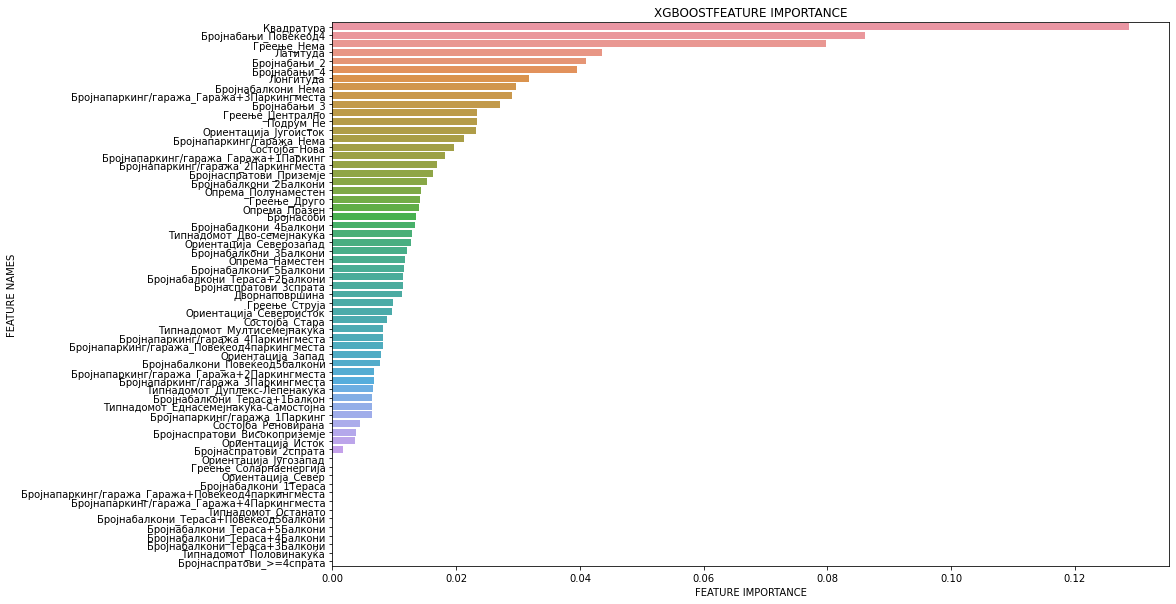

In [ ]:
plot_feature_importance(model_onehotenc.feature_importances_, features, 'XGBOOST')

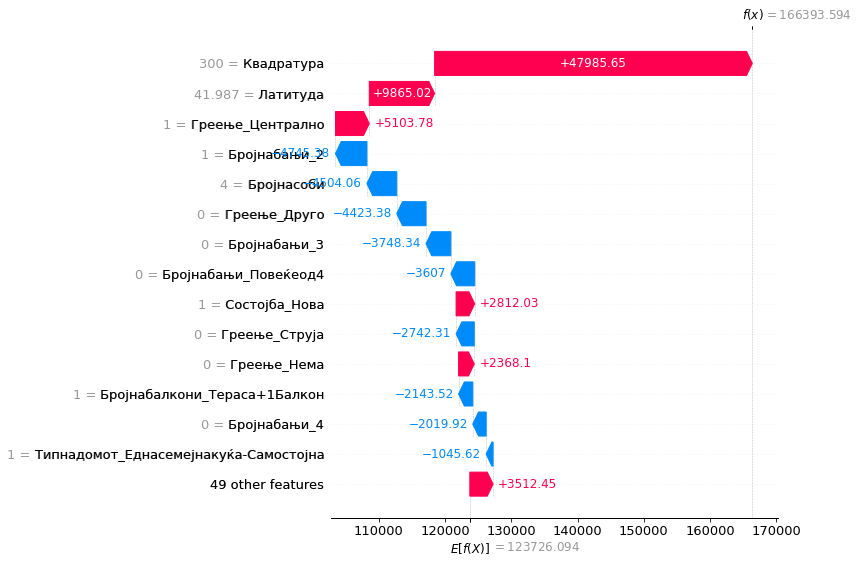

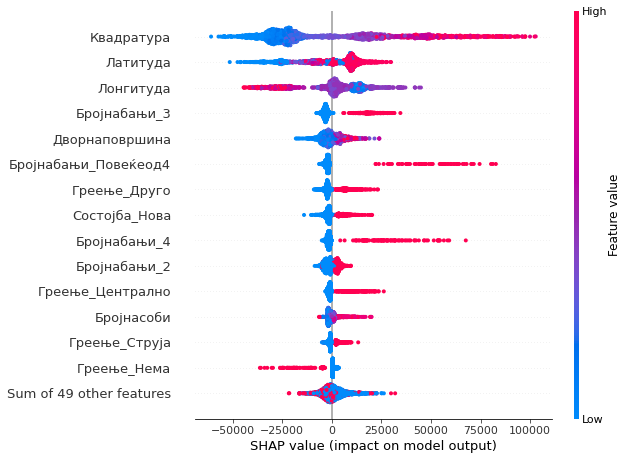

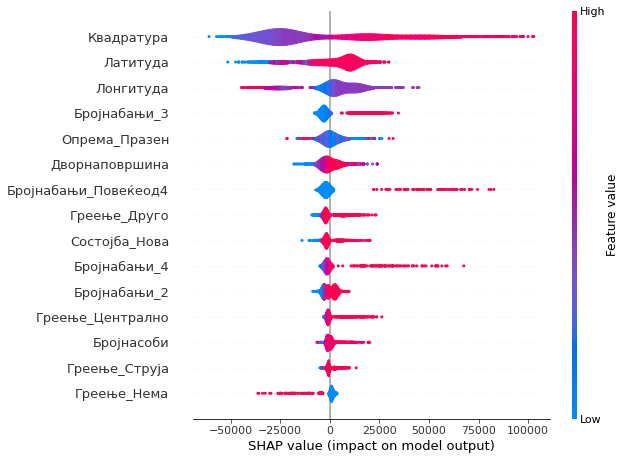

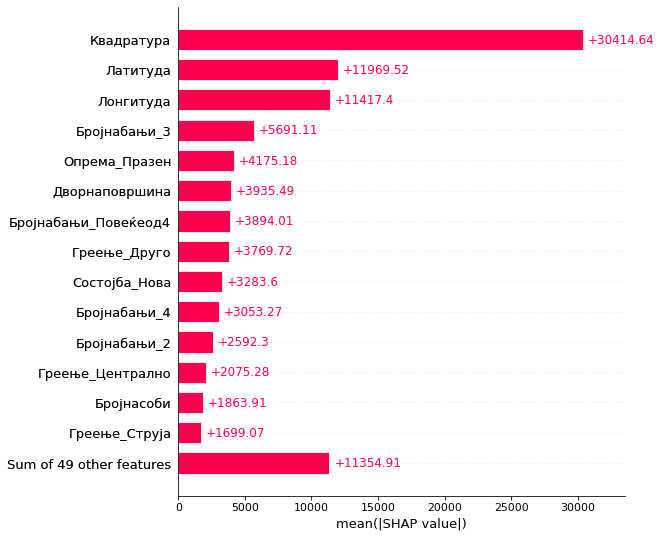

In [ ]:
explainer = shap.Explainer(model_onehotenc)
shap_values = explainer(x)

shap.plots.waterfall(shap_values[0], max_display=15)
shap.plots.beeswarm(shap_values, max_display=15)
shap.summary_plot(shap_values, plot_type='violin', max_display=15)
shap.plots.bar(shap_values, max_display=15)

Model 2
--

<h2>XGBRegressor</h2>

In [ ]:
xgb = XGBRegressor()

gsc = GridSearchCV(
            estimator=xgb,
            param_grid={"learning_rate": (0.10, 0.15, 0.18, 0.20),
                        "max_depth": [ 3, 4, 5, 6, 8],
                        "min_child_weight": [ 1, 3, 5, 6, 7],
                        "colsample_bytree":[ 0.3, 0.4, 0.5, 0.6, 0.7],
                        'objective':['reg:squarederror'],
                        'n_estimators': [5, 10, 15, 20, 25],
                        'random_state' : [0]
                        },
            cv=3, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)

gsc.fit(x, y)

print("Best score:", gsc.best_score_)
print("Best estimator:", gsc.best_estimator_)
print("Best parameters:", gsc.best_params_)

Fitting 3 folds for each of 2500 candidates, totalling 7500 fits
Best score: -43731.82121756068
Best estimator: XGBRegressor(colsample_bytree=0.5, max_depth=6, min_child_weight=6,
             n_estimators=25, objective='reg:squarederror')
Best parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 6, 'n_estimators': 25, 'objective': 'reg:squarederror', 'random_state': 0}


In [34]:
model_onehotenc2 = XGBRegressor(objective ='reg:squarederror', 
    colsample_bytree = 0.5, learning_rate = 0.1, min_child_weight=6,
    max_depth = 6, alpha = 2, n_estimators = 25, random_state=0)


model_onehotenc2.fit(X_train, Y_train)
y_pred = model_onehotenc2.predict(X_test)

print("Mean Absolute Error : " + str(np.sqrt(mean_absolute_error(y_pred, Y_test))))
print("Mean Squared Error : " + str(np.sqrt(mean_squared_error(y_pred, Y_test))))
print("Mean Absolute Percentage error: " + str(mean_absolute_percentage_error(Y_test, y_pred)))
print("R2_score:" +str( r2_score(y_pred,Y_test)))

Mean Absolute Error : 206.63538741402797
Mean Squared Error : 62391.79979938684
Mean Absolute Percentage error: 0.3944900792171581
R2_score:-0.23996025939509913


In [35]:
file_name = "/content/drive/MyDrive/xgb_reg_one_hot_enc2_houses.pkl"
# save
pickle.dump(model_onehotenc2, open(file_name, "wb"))

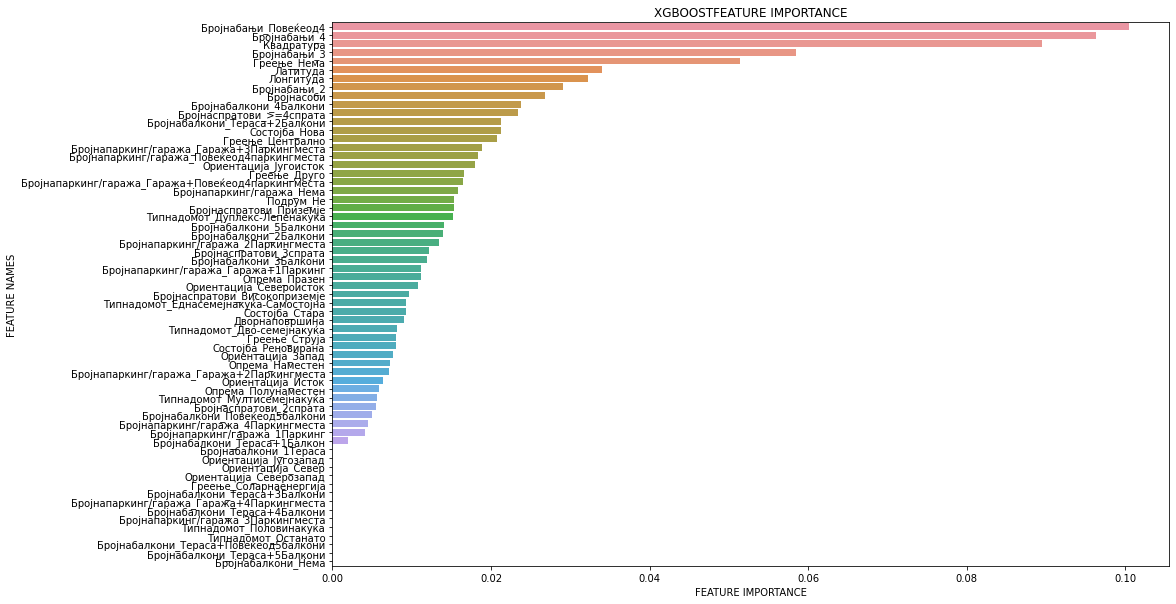

In [ ]:
plot_feature_importance(model_onehotenc2.feature_importances_, features, 'XGBOOST')

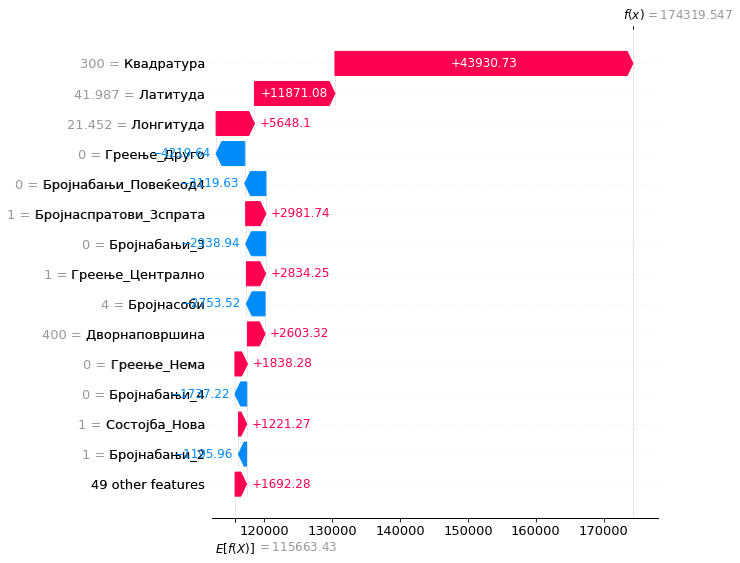

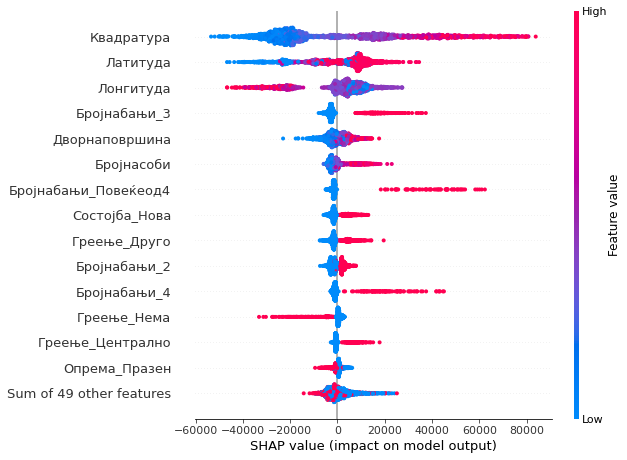

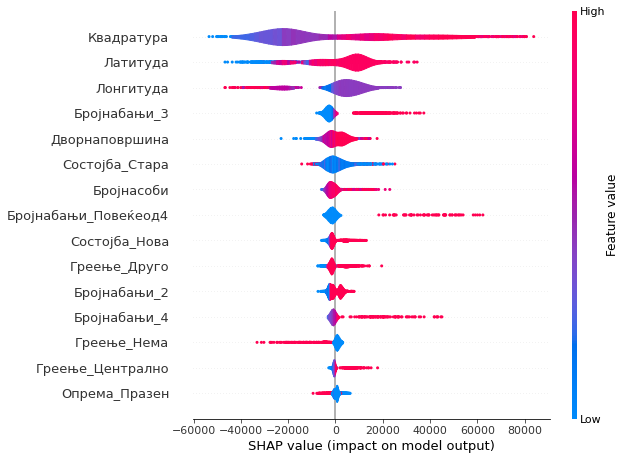

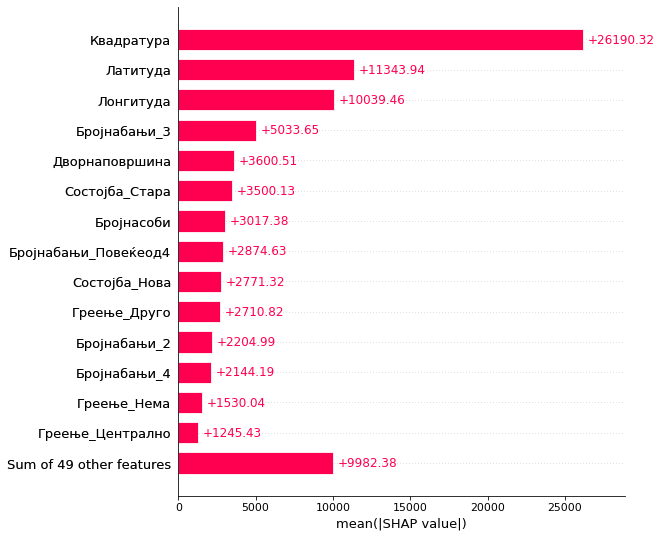

In [ ]:
explainer = shap.Explainer(model_onehotenc2)
shap_values = explainer(x)

shap.plots.waterfall(shap_values[0], max_display=15)
shap.plots.beeswarm(shap_values, max_display=15)
shap.summary_plot(shap_values, plot_type='violin', max_display=15)
shap.plots.bar(shap_values, max_display=15)

Model 3
--

<h2>CatBoostRegressor</h2>

In [ ]:
cbr = CatBoostRegressor()

gsc = GridSearchCV(
            estimator=cbr,
            param_grid={'iterations': [50, 100, 150, 200, 250],
                        'learning_rate': [0.03, 0.05, 0.1, 0.15, 0.2],
                        'depth': [2, 4, 6, 8],
                        'l2_leaf_reg': [0.2, 0.5, 1, 3, 5],
                        'loss_function': ['RMSE', 'MAE'],
                        'random_state' : [0],
                        'verbose': [3]
                        },
            cv=3, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)

gsc.fit(x, y)

print("Best score:", gsc.best_score_)
print("Best estimator:", gsc.best_estimator_)
print("Best parameters:", gsc.best_params_)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits
0:	learn: 62773.0239648	total: 5.84ms	remaining: 1.45s
3:	learn: 60506.9478437	total: 19ms	remaining: 1.17s
6:	learn: 58400.1787818	total: 31.9ms	remaining: 1.11s
9:	learn: 56275.2259923	total: 44.7ms	remaining: 1.07s
12:	learn: 54366.3057060	total: 57.7ms	remaining: 1.05s
15:	learn: 52788.9749834	total: 70.7ms	remaining: 1.03s
18:	learn: 51396.4848768	total: 83.3ms	remaining: 1.01s
21:	learn: 50095.2193549	total: 99.7ms	remaining: 1.03s
24:	learn: 48914.0146234	total: 118ms	remaining: 1.06s
27:	learn: 47827.7065842	total: 131ms	remaining: 1.04s
30:	learn: 46945.9801635	total: 143ms	remaining: 1.01s
33:	learn: 46123.1081971	total: 156ms	remaining: 991ms
36:	learn: 45279.0692477	total: 169ms	remaining: 970ms
39:	learn: 44593.0097606	total: 181ms	remaining: 953ms
42:	learn: 43956.5864516	total: 194ms	remaining: 935ms
45:	learn: 43380.1150396	total: 213ms	remaining: 943ms
48:	learn: 42846.5688602	total: 225ms	remaining: 925m

In [36]:
model_onehotenc3 = CatBoostRegressor(iterations=250, l2_leaf_reg=1, learning_rate=0.03, 
                           loss_function='MAE', depth=8, random_state=0, verbose=False)

model_onehotenc3.fit(X_train, Y_train)
y_pred = model_onehotenc3.predict(X_test)

print("Mean Absolute Error : " + str(np.sqrt(mean_absolute_error(y_pred, Y_test))))
print("Mean Squared Error : " + str(np.sqrt(mean_squared_error(y_pred, Y_test))))
print("Mean Absolute Percentage error: " + str(mean_absolute_percentage_error(Y_test, y_pred)))
print("R2_score:" +str( r2_score(y_pred,Y_test)))

Mean Absolute Error : 204.8757863241089
Mean Squared Error : 62214.29484252553
Mean Absolute Percentage error: 0.3801738726469857
R2_score:-0.16608508266381095


In [37]:
file_name = "/content/drive/MyDrive/cbr_reg_onehotenc_houses.pkl"
# save
pickle.dump(model_onehotenc3, open(file_name, "wb"))

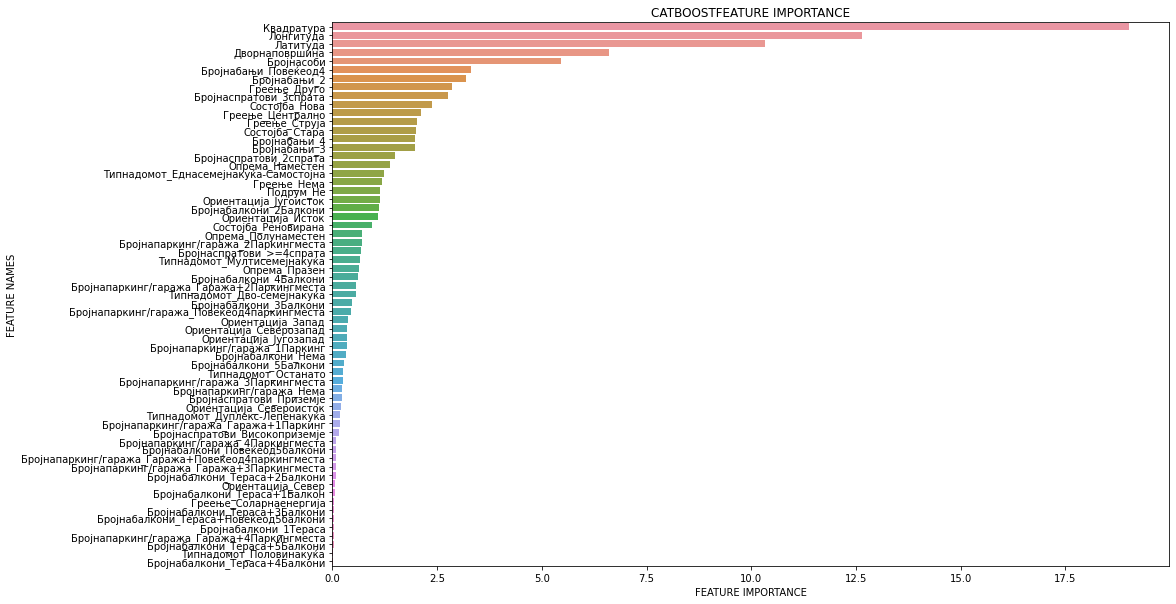

In [ ]:
plot_feature_importance(model_onehotenc3.feature_importances_, model_onehotenc3.feature_names_, 'CATBOOST')

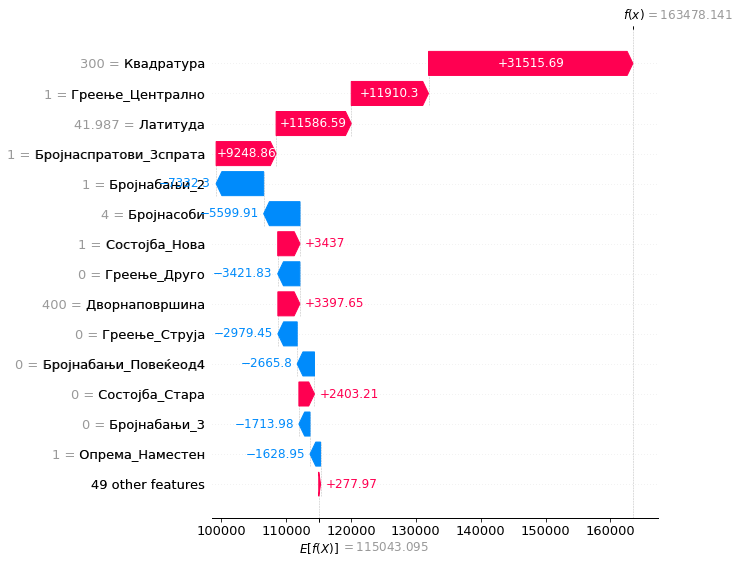

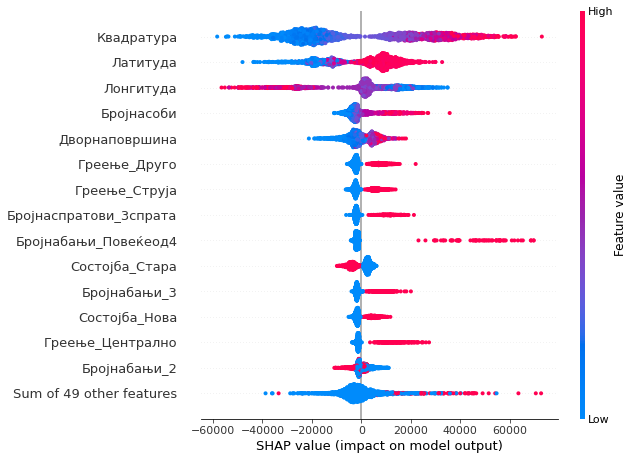

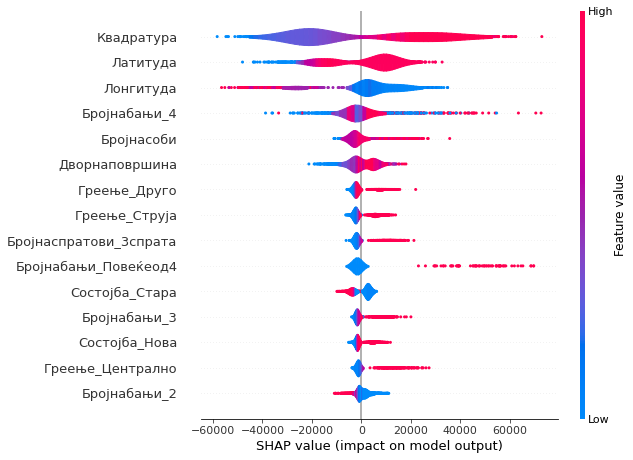

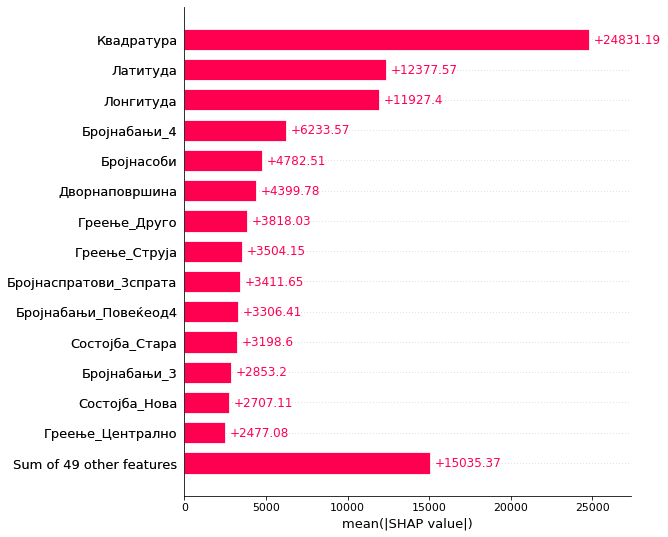

In [ ]:
explainer = shap.Explainer(model_onehotenc3)
shap_values = explainer(x)

shap.plots.waterfall(shap_values[0], max_display=15)
shap.plots.beeswarm(shap_values, max_display=15)
shap.summary_plot(shap_values, plot_type='violin', max_display=15)
shap.plots.bar(shap_values, max_display=15)

Model 4
--

<h2>LGBMRegressor</h2>

In [ ]:
lgbm = LGBMRegressor()

gsc = GridSearchCV(
            estimator=lgbm,
            param_grid={'num_leaves': [7, 14, 21, 28, 31, 50],
                        'learning_rate': [0.03, 0.1, 0.5, 0.10, 0.15],
                        'max_depth': [3, 4, 5, 6, 8],
                        'n_estimators': [50, 100, 150, 200, 500],
                        'random_state' : [0]
                        },
            cv=3, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)

gsc.fit(x, y)

print("Best score:", gsc.best_score_)
print("Best estimator:", gsc.best_estimator_)
print("Best parameters:", gsc.best_params_)

Fitting 3 folds for each of 750 candidates, totalling 2250 fits
Best score: -44247.08878980565
Best estimator: LGBMRegressor(max_depth=5, n_estimators=50, num_leaves=28, random_state=0)
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'num_leaves': 28, 'random_state': 0}


In [38]:
model_onehotenc4 = LGBMRegressor(learning_rate=0.1, max_depth=5, n_estimators=50,
                       num_leaves=28, random_state=0)

model_onehotenc4.fit(X_train, Y_train)
y_pred = model_onehotenc4.predict(X_test)

print("Mean Absolute Error : " + str(np.sqrt(mean_absolute_error(y_pred, Y_test))))
print("Mean Squared Error : " + str(np.sqrt(mean_squared_error(y_pred, Y_test))))
print("Mean Absolute Percentage error: " + str(mean_absolute_percentage_error(Y_test, y_pred)))
print("R2_score:" +str( r2_score(y_pred,Y_test)))

Mean Absolute Error : 207.92857186414955
Mean Squared Error : 61975.83239980778
Mean Absolute Percentage error: 0.4250419026797252
R2_score:0.1430031460221559


In [39]:
file_name = "/content/drive/MyDrive/lgbm_reg_houses_onehotenc.pkl"
# save
pickle.dump(model_onehotenc4, open(file_name, "wb"))

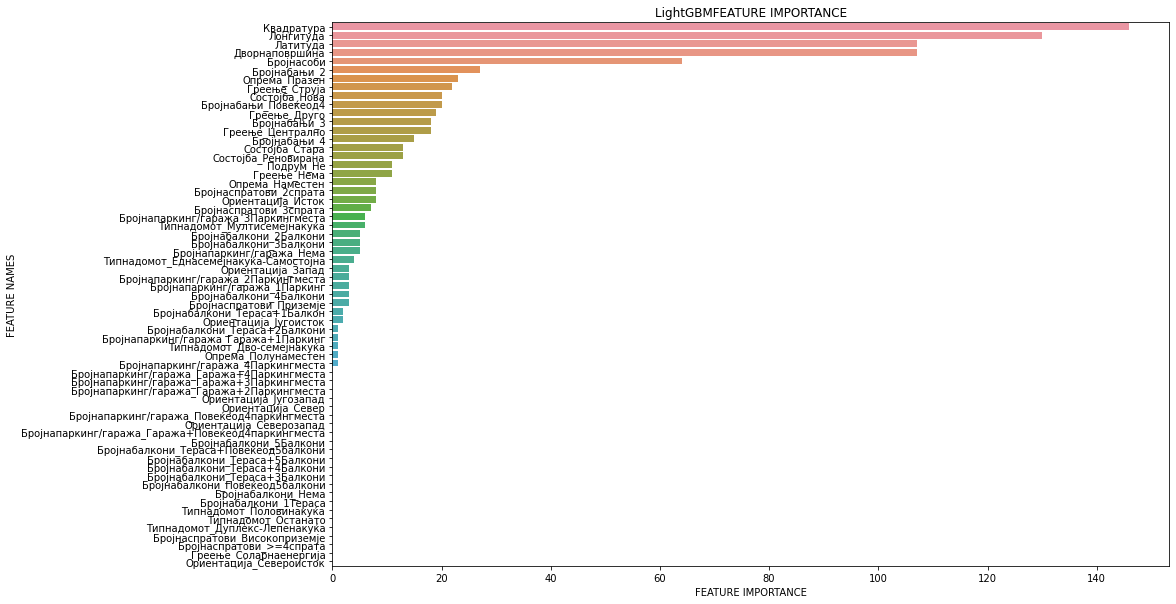

In [ ]:
plot_feature_importance(model_onehotenc4.feature_importances_, features, 'LightGBM')

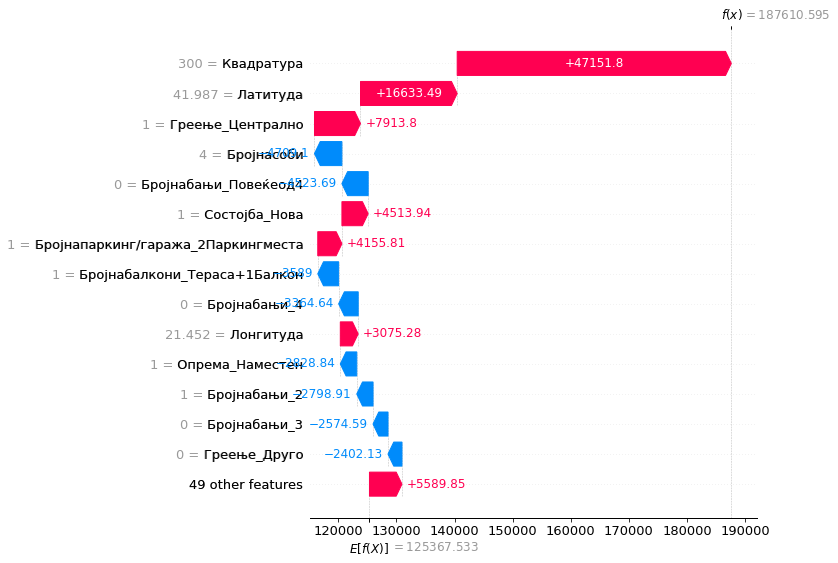

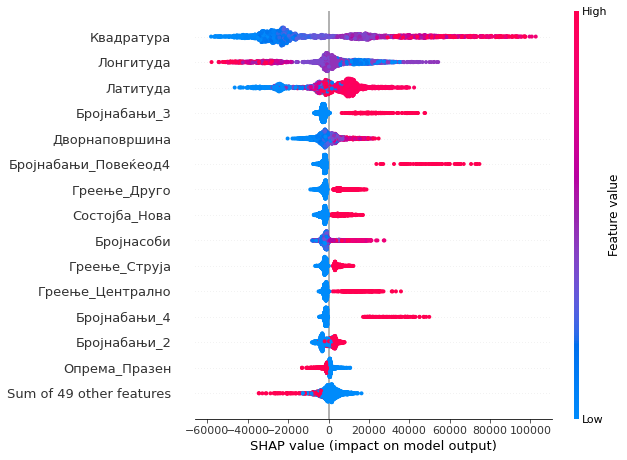

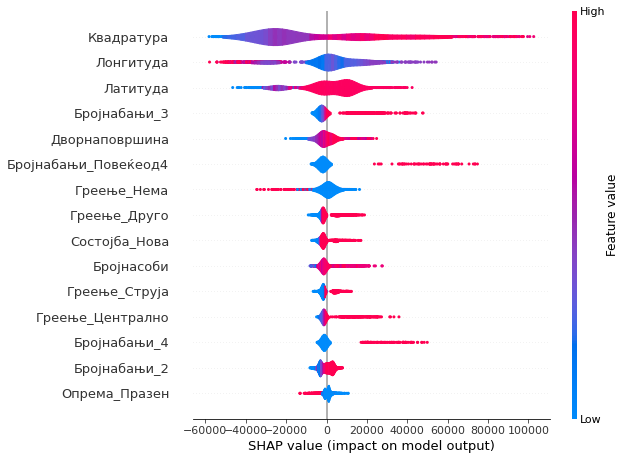

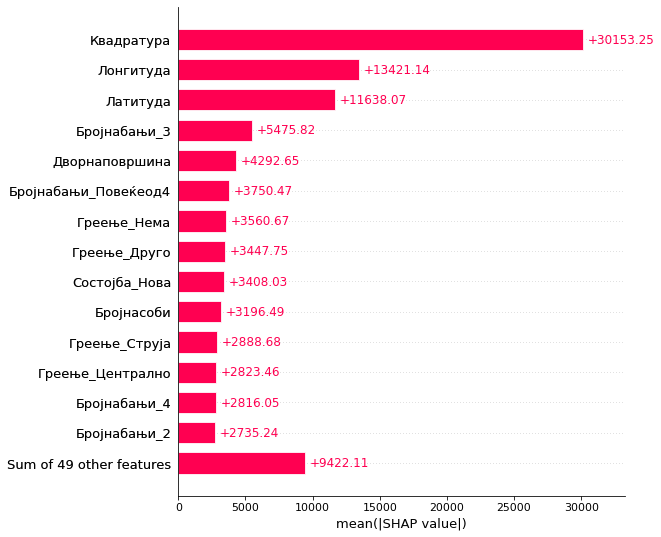

In [ ]:
explainer = shap.Explainer(model_onehotenc4)
shap_values = explainer(x)

shap.plots.waterfall(shap_values[0], max_display=15)
shap.plots.beeswarm(shap_values, max_display=15)
shap.summary_plot(shap_values, plot_type='violin', max_display=15)
shap.plots.bar(shap_values, max_display=15)

SUMMARY
--

In [ ]:
from sklearn import metrics
algorithms = []

algorithms.append(XGBRegressor(objective ='reg:squarederror',
    colsample_bytree = 0.5, learning_rate = 0.2, min_child_weight=7, 
    max_depth = 5, alpha = 2, n_estimators = 20, random_state=0))

algorithms.append(XGBRegressor(objective ='reg:squarederror', 
    colsample_bytree = 0.5, learning_rate = 0.1, min_child_weight=6,
    max_depth = 6, alpha = 2, n_estimators = 25, random_state=0))

algorithms.append(CatBoostRegressor(iterations=250, l2_leaf_reg=1, learning_rate=0.03, 
                           loss_function='MAE', depth=8, random_state=0, verbose=False))

algorithms.append(LGBMRegressor(learning_rate=0.1, max_depth=5, n_estimators=50,
                       num_leaves=28, random_state=0))

data = []

for algo in algorithms:

  algo.fit(X_train, Y_train)

  y_pred = algo.predict(X_test)

  data.append(({
        'Mean Absolute Error': np.sqrt(metrics.mean_absolute_error(y_pred, Y_test)),
        'Mean Absolute Percentage Error': metrics.mean_absolute_percentage_error(y_pred, Y_test),
        'R2 score': metrics.r2_score(y_pred, Y_test),
        'Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_pred, Y_test))
        }))
  

results = pd.DataFrame(data=data, columns=['Mean Absolute Error', 'Mean Absolute Percentage Error', 'R2 score',
                                           'Mean Squared Error'],
                       index=['XGBRegressor1', 'XGBRegressor2', 
                              'CatBoostRegressor', 'LGBMRegressor'])

results

Mean Absolute Error  Mean Absolute Percentage Error  \
XGBRegressor1               206.668583                        0.348322   
XGBRegressor2               206.635387                        0.357594   
CatBoostRegressor           204.875786                        0.361773   
LGBMRegressor               207.928572                        0.344655   

                   R2 score  Mean Squared Error  
XGBRegressor1      0.059187        61078.074863  
XGBRegressor2     -0.239960        62391.799799  
CatBoostRegressor -0.166085        62214.294843  
LGBMRegressor      0.143003        61975.832400

Најдобри перформанси за податоците енкодирани со One-Hot Encoding има моделот CatBoostRegressor со средна апсолутна грешка од 204.875786

Со логаритамска трансформација на дворната површина и цената
--

In [ ]:
features = transf_onehot_houses.columns.tolist()
features.remove('Цена')
features

['Латитуда',
 'Лонгитуда',
 'Бројнасоби',
 'Квадратура',
 'Дворнаповршина',
 'Греење_Друго',
 'Греење_Нема',
 'Греење_Соларнаенергија',
 'Греење_Струја',
 'Греење_Централно',
 'Бројнаспратови_2спрата',
 'Бројнаспратови_3спрата',
 'Бројнаспратови_>=4спрата',
 'Бројнаспратови_Високоприземје',
 'Бројнаспратови_Приземје',
 'Типнадомот_Двo-семејнакуќа',
 'Типнадомот_Дуплекс-Лепенакуќа',
 'Типнадомот_Еднасемејнакуќа-Самостојна',
 'Типнадомот_Мултисемејнакуќа',
 'Типнадомот_Останато',
 'Типнадомот_Половинакуќа',
 'Состојба_Нова',
 'Состојба_Реновирана',
 'Состојба_Стара',
 'Опрема_Наместен',
 'Опрема_Полунаместен',
 'Опрема_Празен',
 'Бројнабалкони_1Тераса',
 'Бројнабалкони_2Балкони',
 'Бројнабалкони_3Балкони',
 'Бројнабалкони_4Балкони',
 'Бројнабалкони_5Балкони',
 'Бројнабалкони_Нема',
 'Бројнабалкони_Повеќеод5балкони',
 'Бројнабалкони_Тераса+1Балкон',
 'Бројнабалкони_Тераса+2Балкони',
 'Бројнабалкони_Тераса+3Балкони',
 'Бројнабалкони_Тераса+4Балкони',
 'Бројнабалкони_Тераса+5Балкони',
 'Бро

In [40]:
x = transf_onehot_houses.loc[:, transf_onehot_houses.columns != 'Цена']
y = transf_onehot_houses['Цена']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Model 5
--

<h2>XGBRegressor</h2>

In [ ]:
xgb = XGBRegressor()

gsc = GridSearchCV(
            estimator=xgb,
            param_grid={"learning_rate": (0.1, 0.15, 0.20, 0.22, 0.25),
                        "max_depth": [ 5, 6, 7, 8],
                        "min_child_weight": [ 1, 3, 5, 6, 7],
                        "colsample_bytree":[ 0.4, 0.5, 0.6, 0.7],
                        'objective':['reg:squarederror'],
                        'n_estimators': [10, 15, 20, 25],
                        'random_state' : [0]
                        },
            cv=3, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)

gsc.fit(x, y)

print("Best score:", gsc.best_score_)
print("Best estimator:", gsc.best_estimator_)
print("Best parameters:", gsc.best_params_)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits
Best score: -0.3519383615299099
Best estimator: XGBRegressor(colsample_bytree=0.7, learning_rate=0.22, max_depth=5,
             n_estimators=25, objective='reg:squarederror')
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.22, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 25, 'objective': 'reg:squarederror', 'random_state': 0}


In [41]:
model_onehotenc5 = XGBRegressor(objective ='reg:squarederror',
    colsample_bytree = 0.7, learning_rate = 0.22, min_child_weight=1, 
    max_depth = 5, n_estimators = 25, random_state=0)


model_onehotenc5.fit(X_train, Y_train)
y_pred = model_onehotenc5.predict(X_test)

print("Mean Absolute Error : " + str(np.sqrt(mean_absolute_error(y_pred, Y_test))))
print("Mean Squared Error : " + str(np.sqrt(mean_squared_error(y_pred, Y_test))))
print("Mean Absolute Percentage error: " + str(mean_absolute_percentage_error(Y_test, y_pred)))
print("R2_score:" +str( r2_score(y_pred,Y_test)))

Mean Absolute Error : 0.5803311382966054
Mean Squared Error : 0.42591003679537837
Mean Absolute Percentage error: 0.029183860696346223
R2_score:0.19373797279932436


In [42]:
file_name = "/content/drive/MyDrive/xgb_reg_one_hot_enc5_houses_transformed.pkl"
# save
pickle.dump(model_onehotenc5, open(file_name, "wb"))

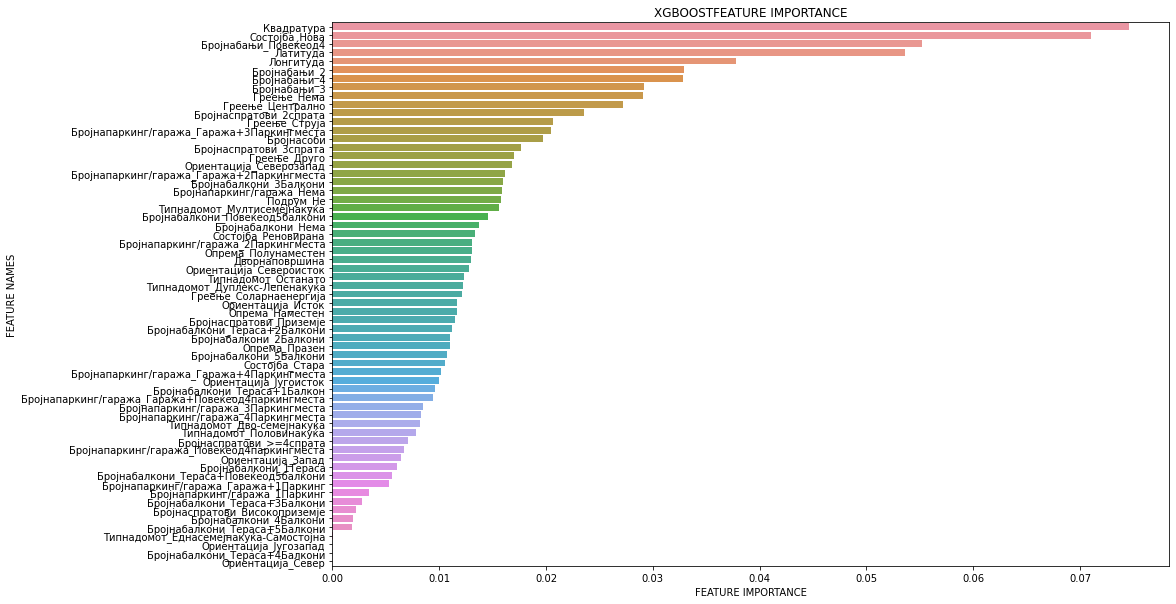

In [ ]:
plot_feature_importance(model_onehotenc5.feature_importances_, features, 'XGBOOST')

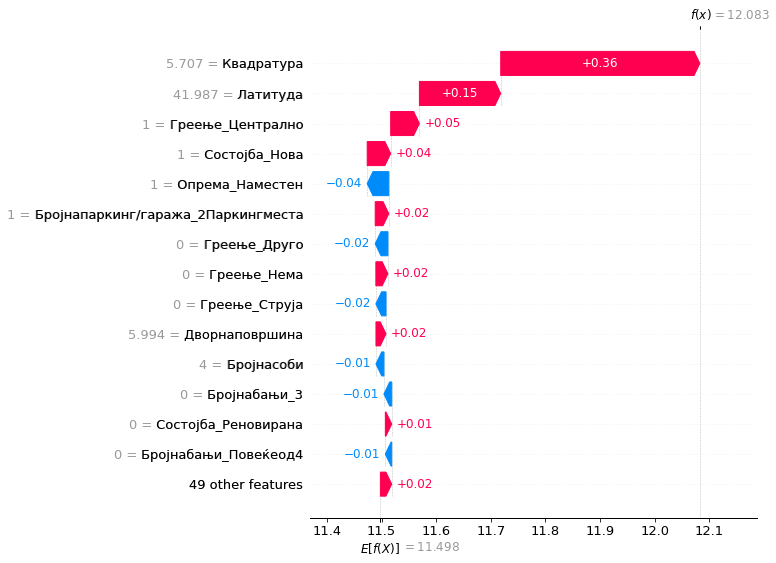

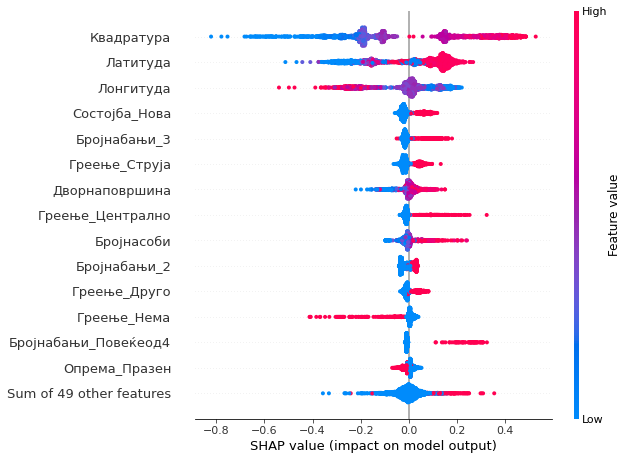

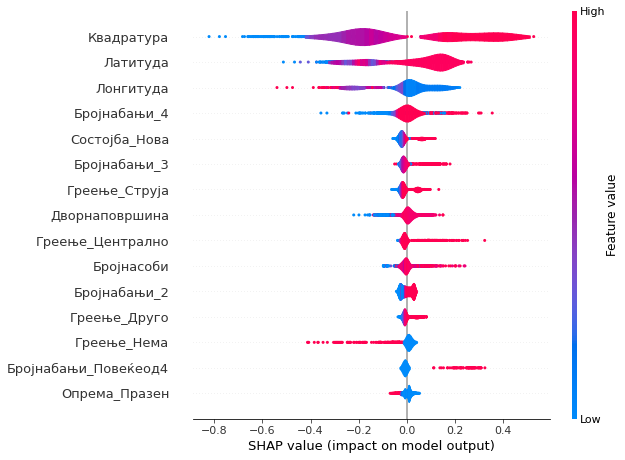

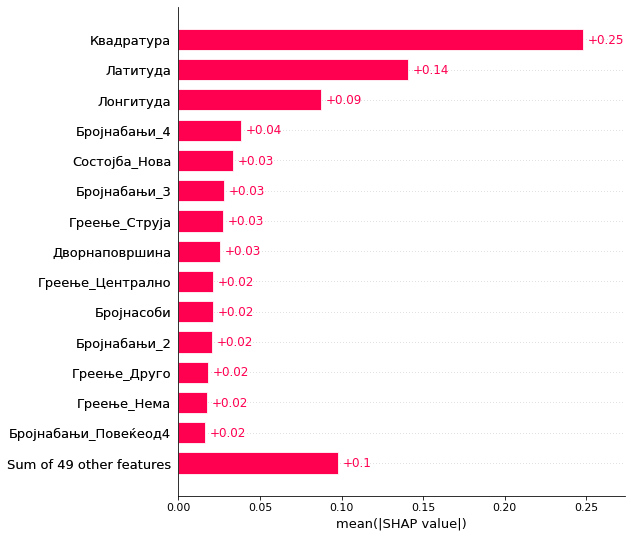

In [ ]:
explainer = shap.Explainer(model_onehotenc5)
shap_values = explainer(x)

shap.plots.waterfall(shap_values[0], max_display=15)
shap.plots.beeswarm(shap_values, max_display=15)
shap.summary_plot(shap_values, plot_type='violin', max_display=15)
shap.plots.bar(shap_values, max_display=15)

Model 6
--

<h2>XGBRegressor</h2>

In [ ]:
xgb = XGBRegressor()

gsc = GridSearchCV(
            estimator=xgb,
            param_grid={"learning_rate": (0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35),
                        "max_depth": [ 5, 6, 7, 8],
                        "min_child_weight": [ 5, 6, 7, 8],
                        "colsample_bytree":[ 0.3, 0.4, 0.5, 0.7, 0.8],
                        'objective':['reg:squarederror'],
                        'n_estimators': [10, 15, 20, 25, 30, 50],
                        'random_state' : [0]
                        },
            cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

gsc.fit(x, y)

print("Best score:", gsc.best_score_)
print("Best estimator:", gsc.best_estimator_)
print("Best parameters:", gsc.best_params_)

Fitting 3 folds for each of 3360 candidates, totalling 10080 fits
Best score: -0.19393617784651507
Best estimator: XGBRegressor(colsample_bytree=0.7, learning_rate=0.15, max_depth=5,
             min_child_weight=7, n_estimators=50, objective='reg:squarederror')
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.15, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 50, 'objective': 'reg:squarederror', 'random_state': 0}


In [43]:
model_onehotenc6 = XGBRegressor(objective ='reg:squarederror',
    colsample_bytree = 0.7, learning_rate = 0.15, min_child_weight=7, 
    max_depth = 5, n_estimators = 50)


model_onehotenc6.fit(X_train, Y_train)
y_pred = model_onehotenc6.predict(X_test)

print("Mean Absolute Error : " + str(np.sqrt(mean_absolute_error(y_pred, Y_test))))
print("Mean Squared Error : " + str(np.sqrt(mean_squared_error(y_pred, Y_test))))
print("Mean Absolute Percentage error: " + str(mean_absolute_percentage_error(Y_test, y_pred)))
print("R2_score:" +str( r2_score(y_pred,Y_test)))

Mean Absolute Error : 0.5654272462858493
Mean Squared Error : 0.4081274324362136
Mean Absolute Percentage error: 0.02775705231828354
R2_score:0.28341970945588935


In [44]:
file_name = "/content/drive/MyDrive/xgb_reg_one_hot_enc6_houses_transformed.pkl"
# save
pickle.dump(model_onehotenc6, open(file_name, "wb"))

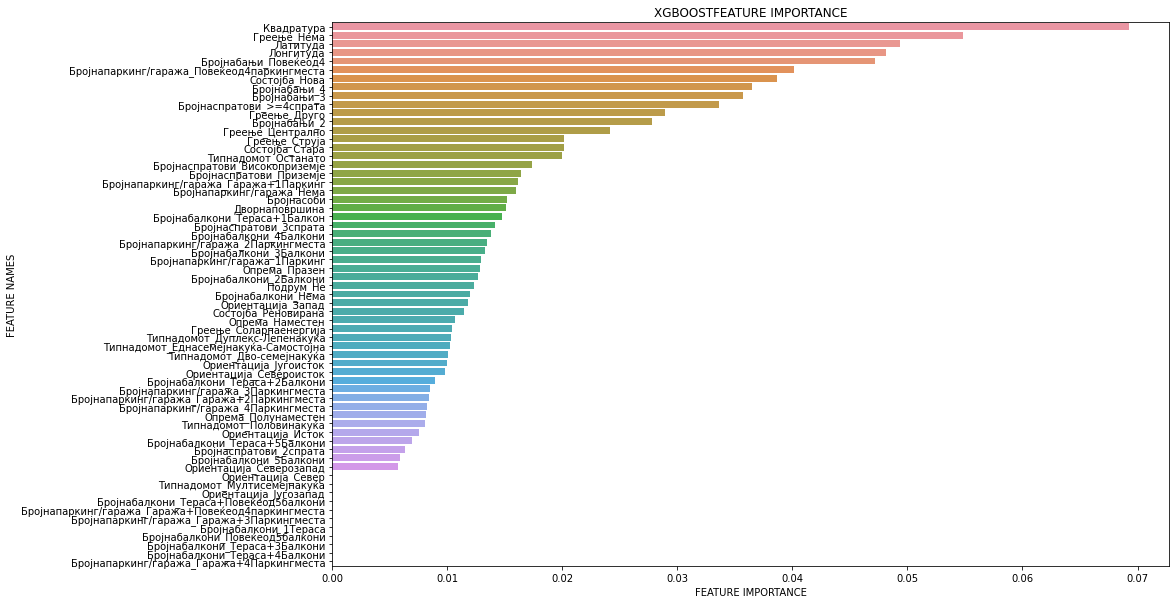

In [ ]:
plot_feature_importance(model_onehotenc6.feature_importances_, features, 'XGBOOST')

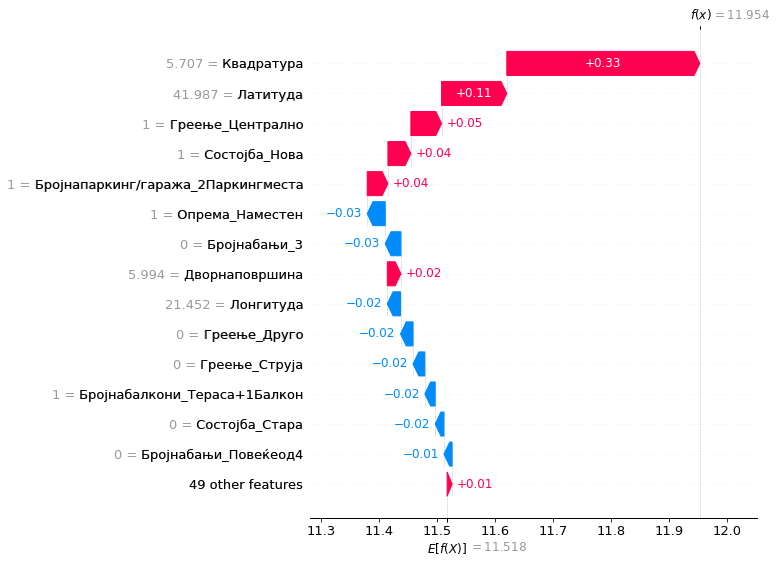

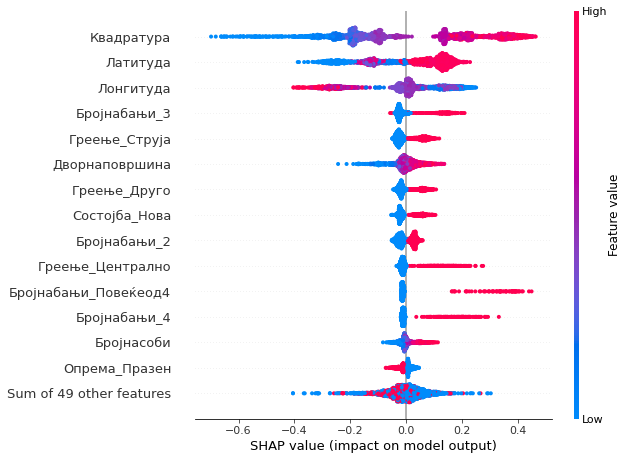

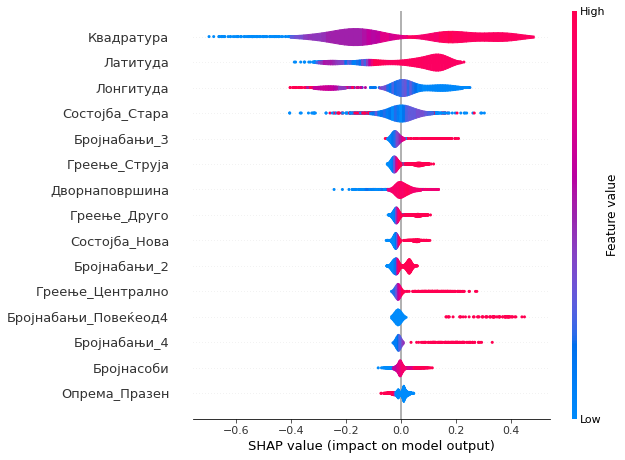

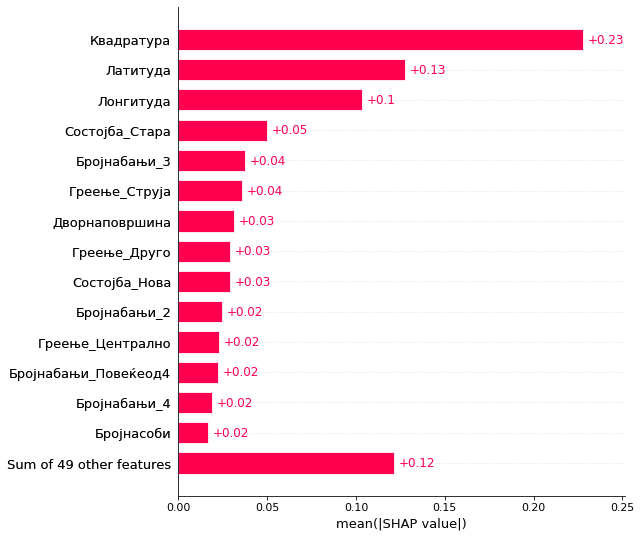

In [ ]:
explainer = shap.Explainer(model_onehotenc6)
shap_values = explainer(x)

shap.plots.waterfall(shap_values[0], max_display=15)
shap.plots.beeswarm(shap_values, max_display=15)
shap.summary_plot(shap_values, plot_type='violin', max_display=15)
shap.plots.bar(shap_values, max_display=15)

Model 7
--

<h2>CatBoostRegressor</h2>

In [ ]:
cbr = CatBoostRegressor()

gsc = GridSearchCV(
            estimator=cbr,
            param_grid={'iterations': [50, 100, 150, 200],
                        'learning_rate': [0.03, 0.05, 0.10, 0.15, 0.2, 0.25],
                        'depth': [2, 4, 6, 8],
                        'l2_leaf_reg': [0.2, 0.5, 1, 3],
                        'loss_function': ['RMSE', 'MAE'],
                        'random_state' : [0],
                        'verbose': [3]
                        },
            cv=3, scoring='neg_mean_absolute_error', verbose=3, n_jobs=-1)

gsc.fit(x, y)

print("Best score:", gsc.best_score_)
print("Best estimator:", gsc.best_estimator_)
print("Best parameters:", gsc.best_params_)

Fitting 3 folds for each of 768 candidates, totalling 2304 fits
0:	learn: 0.6380367	total: 54ms	remaining: 10.7s
3:	learn: 0.6030639	total: 70.3ms	remaining: 3.44s
6:	learn: 0.5744515	total: 86.1ms	remaining: 2.37s
9:	learn: 0.5493470	total: 102ms	remaining: 1.94s
12:	learn: 0.5276209	total: 118ms	remaining: 1.7s
15:	learn: 0.5095689	total: 134ms	remaining: 1.54s
18:	learn: 0.4933996	total: 151ms	remaining: 1.44s
21:	learn: 0.4802036	total: 167ms	remaining: 1.35s
24:	learn: 0.4695684	total: 183ms	remaining: 1.28s
27:	learn: 0.4601222	total: 199ms	remaining: 1.22s
30:	learn: 0.4519268	total: 215ms	remaining: 1.17s
33:	learn: 0.4440977	total: 231ms	remaining: 1.13s
36:	learn: 0.4375130	total: 253ms	remaining: 1.11s
39:	learn: 0.4320633	total: 271ms	remaining: 1.08s
42:	learn: 0.4270511	total: 288ms	remaining: 1.05s
45:	learn: 0.4224523	total: 304ms	remaining: 1.02s
48:	learn: 0.4184072	total: 321ms	remaining: 989ms
51:	learn: 0.4143343	total: 338ms	remaining: 961ms
54:	learn: 0.4109192	t

In [45]:
model_onehotenc7 = CatBoostRegressor(iterations=200, l2_leaf_reg=3, learning_rate=0.05, 
                           loss_function='MAE', depth=8, random_state=0, verbose=False)

model_onehotenc7.fit(X_train, Y_train)
y_pred = model_onehotenc7.predict(X_test)

print("Mean Absolute Error : " + str(np.sqrt(mean_absolute_error(y_pred, Y_test))))
print("Mean Squared Error : " + str(np.sqrt(mean_squared_error(y_pred, Y_test))))
print("Mean Absolute Percentage error: " + str(mean_absolute_percentage_error(Y_test, y_pred)))
print("R2_score:" +str( r2_score(y_pred,Y_test)))

Mean Absolute Error : 0.5676526043413241
Mean Squared Error : 0.4142551704234
Mean Absolute Percentage error: 0.0279132183015142
R2_score:0.22284294629995294


In [46]:
file_name = "/content/drive/MyDrive/cbr_reg7_houses_onehotenc_transformed.pkl"
# save
pickle.dump(model_onehotenc7, open(file_name, "wb"))

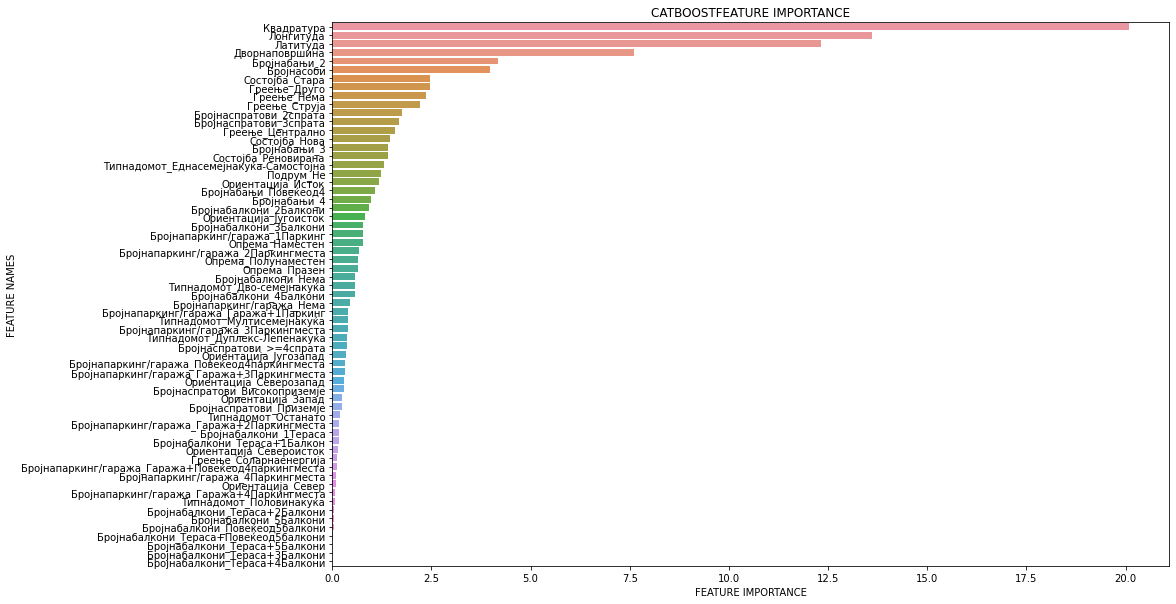

In [ ]:
plot_feature_importance(model_onehotenc7.feature_importances_, model_onehotenc7.feature_names_, 'CATBOOST')

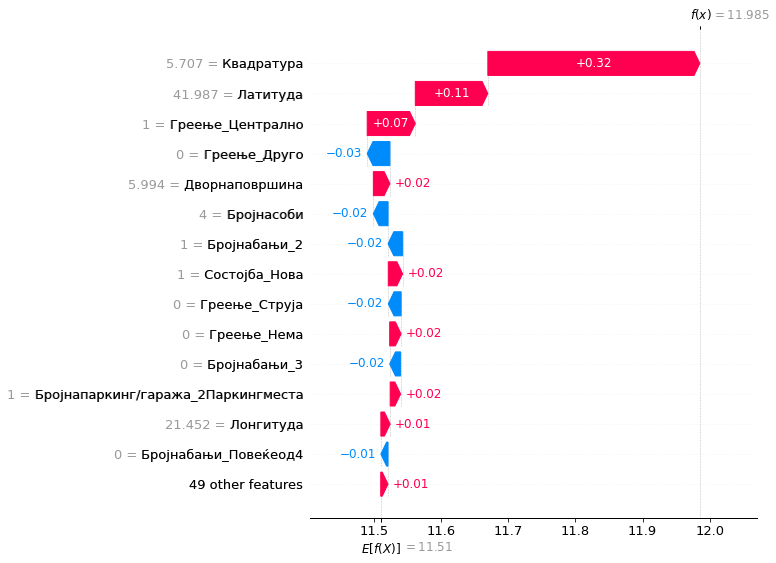

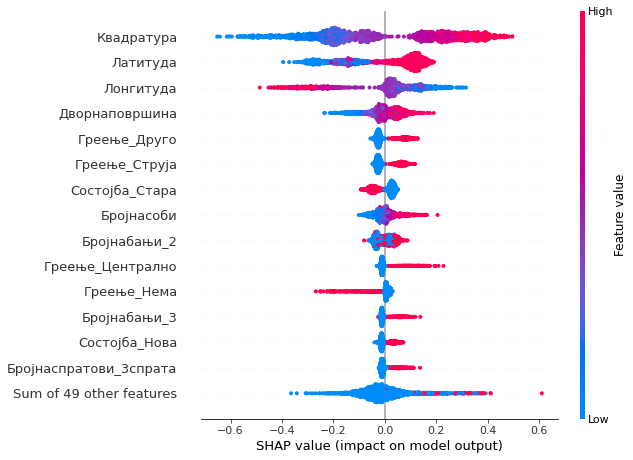

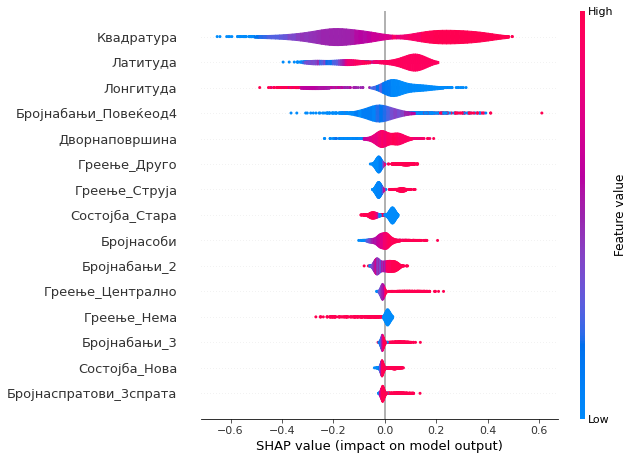

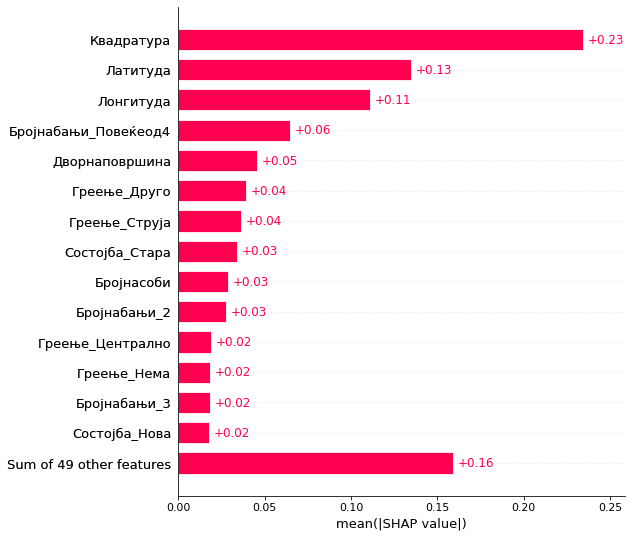

In [ ]:
explainer = shap.Explainer(model_onehotenc7)
shap_values = explainer(x)

shap.plots.waterfall(shap_values[0], max_display=15)
shap.plots.beeswarm(shap_values, max_display=15)
shap.summary_plot(shap_values, plot_type='violin', max_display=15)
shap.plots.bar(shap_values, max_display=15)

Model 8
--

<h2>LGBMRegressor</h2>

In [ ]:
lgbm = LGBMRegressor()

gsc = GridSearchCV(
            estimator=lgbm,
            param_grid={'num_leaves': [7, 14, 21, 28, 31, 50],
                        'learning_rate': [0.03, 0.05, 0.10, 0.15, 0.2],
                        'max_depth': [3, 4, 5, 6, 8],
                        'n_estimators': [50, 100, 150, 200, 500],
                        'random_state' : [0]
                        },
            cv=3, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)

gsc.fit(x, y)

print("Best score:", gsc.best_score_)
print("Best estimator:", gsc.best_estimator_)
print("Best parameters:", gsc.best_params_)

Fitting 3 folds for each of 750 candidates, totalling 2250 fits
Best score: -0.34909990809755875
Best estimator: LGBMRegressor(max_depth=6, n_estimators=150, num_leaves=7, random_state=0)
Best parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 150, 'num_leaves': 7, 'random_state': 0}


In [47]:
model_onehotenc8 = LGBMRegressor(learning_rate=0.13, max_depth=6, n_estimators=150,
                       num_leaves=7, random_state=0)

model_onehotenc8.fit(X_train, Y_train)
y_pred = model_onehotenc8.predict(X_test)

print("Mean Absolute Error : " + str(np.sqrt(mean_absolute_error(y_pred, Y_test))))
print("Mean Squared Error : " + str(np.sqrt(mean_squared_error(y_pred, Y_test))))
print("Mean Absolute Percentage error: " + str(mean_absolute_percentage_error(Y_test, y_pred)))
print("R2_score:" +str( r2_score(y_pred,Y_test)))

Mean Absolute Error : 0.5659459528898213
Mean Squared Error : 0.4101206064471503
Mean Absolute Percentage error: 0.02780139549146763
R2_score:0.31177196730608414


In [48]:
file_name = "/content/drive/MyDrive/lgbm_reg_houses_onehotenc_transformed.pkl"
# save
pickle.dump(model_onehotenc8, open(file_name, "wb"))

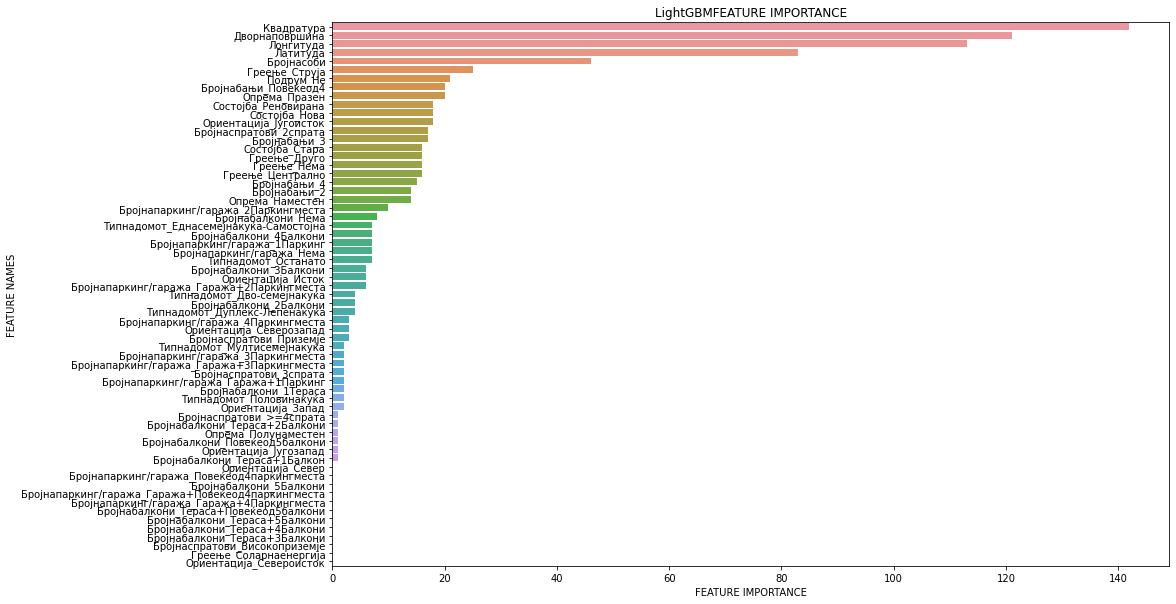

In [ ]:
plot_feature_importance(model_onehotenc8.feature_importances_, features, 'LightGBM')

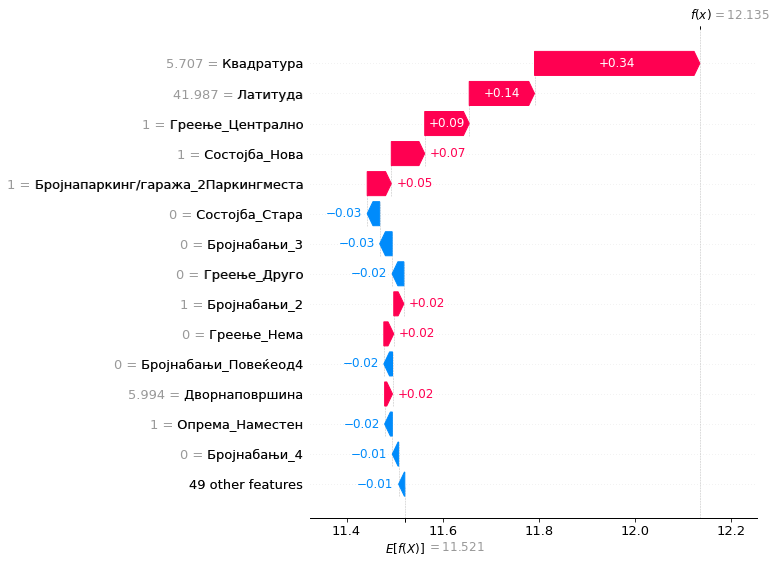

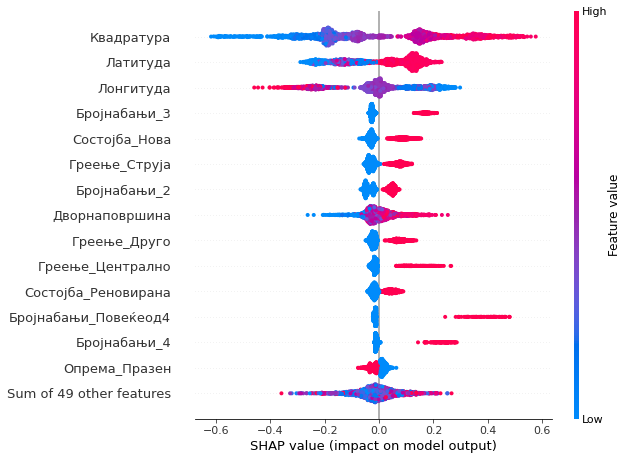

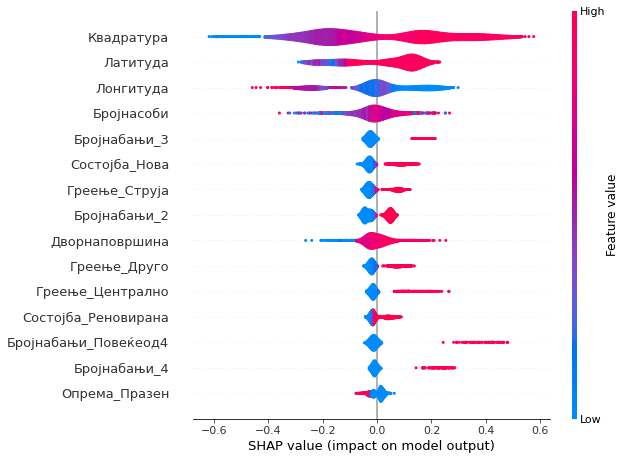

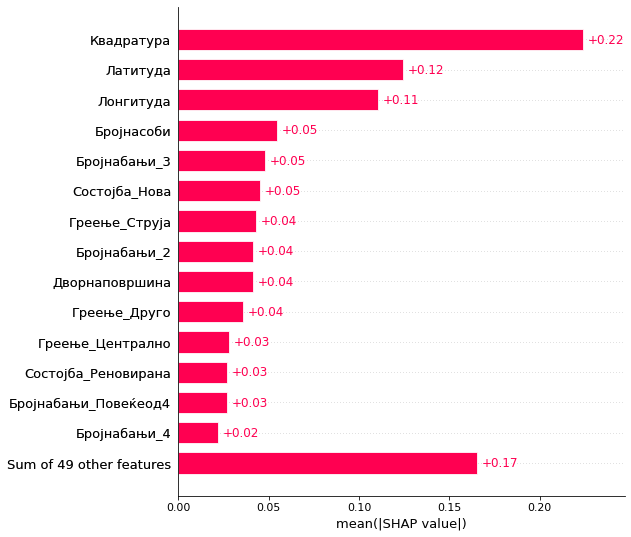

In [ ]:
explainer = shap.Explainer(model_onehotenc8)
shap_values = explainer(x)

shap.plots.waterfall(shap_values[0], max_display=15)
shap.plots.beeswarm(shap_values, max_display=15)
shap.summary_plot(shap_values, plot_type='violin', max_display=15)
shap.plots.bar(shap_values, max_display=15)

SUMMARY
--

In [ ]:
from sklearn import metrics
algorithms = []

algorithms.append(XGBRegressor(objective ='reg:squarederror',
          colsample_bytree = 0.7, learning_rate = 0.22, min_child_weight=1, 
          max_depth = 5, n_estimators = 25, random_state=0))

algorithms.append(XGBRegressor(objective ='reg:squarederror',
          colsample_bytree = 0.7, learning_rate = 0.15, min_child_weight=7, 
          max_depth = 5, n_estimators = 50))

algorithms.append(CatBoostRegressor(iterations=200, l2_leaf_reg=3, learning_rate=0.05, 
                           loss_function='MAE', depth=8, random_state=0, verbose=False))

algorithms.append(LGBMRegressor(learning_rate=0.13, max_depth=6, n_estimators=150,
                       num_leaves=7, random_state=0))
data = []

for algo in algorithms:

  algo.fit(X_train, Y_train)

  y_pred = algo.predict(X_test)

  data.append(({
        'Mean Absolute Error': np.sqrt(metrics.mean_absolute_error(y_pred, Y_test)),
        'Mean Absolute Percentage Error': np.sqrt(metrics.mean_absolute_percentage_error(y_pred, Y_test)),
        'R2 score': metrics.r2_score(y_pred, Y_test),
        'Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_pred, Y_test))
        }))
  

results = pd.DataFrame(data=data, columns=['Mean Absolute Error', 'Mean Absolute Percentage Error', 'R2 score',
                                           'Mean Squared Error'],
                       index=['XGBRegressor1', 'XGBRegressor2', 
                              'CatBoostRegressor', 'LGBMRegressor'])

results

Mean Absolute Error  Mean Absolute Percentage Error  \
XGBRegressor1                 0.580331                        0.171537   
XGBRegressor2                 0.565427                        0.167062   
CatBoostRegressor             0.567653                        0.167764   
LGBMRegressor                 0.565946                        0.167238   

                   R2 score  Mean Squared Error  
XGBRegressor1      0.193738            0.425910  
XGBRegressor2      0.283420            0.408127  
CatBoostRegressor  0.222843            0.414255  
LGBMRegressor      0.311772            0.410121

Најдобри перформанси за податоците енкодирани со One-Hot Encoding со логаритамска трансформација имаат моделите XGBRegressor2 и LGBMRegressor.

Исто така, моделите 9 и 10 имаат слични резултати за кумулативната средна апсолутна грешка, односно 0.5866286485831991 и 0.5900910948295427.

Од резултатите на моделите може да видиме дека моделите над податоците со логаритамска трансформација на дворната површина, и цена имаат многу подобри перформанси од моделите без логаритамска трансформација.


Model 9
--

<h2>XGBRegressor + KFold + RandomizedSearch</h2>

In [ ]:
xgb = XGBRegressor()

param_dist = {"learning_rate": (0.05, 0.10, 0.15, 0.20, 0.25),
                        "max_depth": [ 3, 4, 5, 6, 8],
                        "min_child_weight": [ 1, 3, 5, 7],
                        "gamma":[ 0.0, 0.1, 0.2],
                        "colsample_bytree":[ 0.3, 0.4, 0.5, 0.7],
                        'objective':['reg:linear', 'reg:squarederror'],
                        }
reg = RandomizedSearchCV(xgb, param_distributions = param_dist, n_iter = 25, scoring = 'neg_mean_absolute_error', error_score = 0, verbose = 3, n_jobs = -1)

numFolds = 5
folds = KFold(n_splits = numFolds, shuffle = True)

estimators = []
results = np.zeros(len(x))
score = 0.0
kf = 0

for train_index, test_index in folds.split(x):
    X_train, X_test = x.iloc[train_index,:], x.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index].values.ravel(), y.iloc[test_index].values.ravel()
    reg.fit(X_train, y_train)

    estimators.append(reg.best_estimator_)
    results[test_index] = reg.predict(X_test)
    score += np.sqrt(mean_absolute_error(y_test, results[test_index]))
    print("Mean Absolute error for fold ", kf, "is: ", np.sqrt(mean_absolute_error(y_test, results[test_index])))
    kf += 1
score /= numFolds

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Mean Absolute error for fold  0 is:  0.5848732812644144
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Mean Absolute error for fold  1 is:  0.5880220525376382
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[22:36:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute error for fold  2 is:  0.5905877149147387
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Mean Absolute error for fold  3 is:  0.5959631983063193
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[22:37:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute error for fold  4 is:  0.5736969958928851


In [ ]:
print("Cummulative Mean Absolute Error: ", score)

Cummulative Mean Absolute Error:  0.5866286485831991


In [ ]:
print("Best Random Estimators: ", estimators)

Best Random Estimators:  [XGBRegressor(colsample_bytree=0.7, gamma=0.0, max_depth=5,
             objective='reg:squarederror'), XGBRegressor(colsample_bytree=0.4, gamma=0.1, max_depth=5, min_child_weight=5,
             objective='reg:squarederror'), XGBRegressor(colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=4,
             min_child_weight=5), XGBRegressor(colsample_bytree=0.4, gamma=0.1, learning_rate=0.15,
             min_child_weight=7, objective='reg:squarederror'), XGBRegressor(colsample_bytree=0.4, gamma=0.1, learning_rate=0.2,
             min_child_weight=7)]


Model 10
--

<h2>XGBRegressor + KFold + RandomizedSearch</h2>

In [ ]:
xgb = XGBRegressor()

param_dist = {"learning_rate": (0.01, 0.05, 0.10, 0.15, 0.20),
                        "max_depth": [ 5, 6, 7, 8],
                        "min_child_weight": [ 1, 3, 5, 6, 7],
                        "colsample_bytree":[ 0.2, 0.3, 0.4, 0.6, 0.7, 0.8],
                        'objective':['reg:squarederror'],
                        'n_estimators': [1, 5, 10, 15, 20, 25, 30],
                        'random_state' : [0]
                        }
reg = RandomizedSearchCV(xgb, param_distributions = param_dist, n_iter = 25, scoring = 'neg_mean_absolute_error', error_score = 0, verbose = 3, n_jobs = -1)

numFolds = 5
folds = KFold(n_splits = numFolds, shuffle = True)

estimators = []
results = np.zeros(len(x))
score = 0.0
kf = 1

for train_index, test_index in folds.split(x):
    X_train, X_test = x.iloc[train_index,:], x.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index].values.ravel(), y.iloc[test_index].values.ravel()
    reg.fit(X_train, y_train)

    estimators.append(reg.best_estimator_)
    results[test_index] = reg.predict(X_test)
    score += np.sqrt(mean_absolute_error(y_test, results[test_index]))
    print("Mean Absolute error for fold ", kf, "is: ", np.sqrt(mean_absolute_error(y_test, results[test_index])))
    kf += 1
score /= numFolds

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Mean Absolute error for fold  1 is:  0.5839230997486035
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Mean Absolute error for fold  2 is:  0.5893301118227962
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Mean Absolute error for fold  3 is:  0.595616723371395
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Mean Absolute error for fold  4 is:  0.5949536802571878
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Mean Absolute error for fold  5 is:  0.586631858947731


In [ ]:
print("Cummulative Mean Absolute Error: ", score)

Cummulative Mean Absolute Error:  0.5900910948295427


In [ ]:
print("Best Random Estimators: ", estimators)

Best Random Estimators:  [XGBRegressor(colsample_bytree=0.7, learning_rate=0.2, max_depth=6,
             n_estimators=30, objective='reg:squarederror'), XGBRegressor(colsample_bytree=0.4, learning_rate=0.2, max_depth=5,
             n_estimators=30, objective='reg:squarederror'), XGBRegressor(colsample_bytree=0.6, learning_rate=0.2, max_depth=8,
             min_child_weight=5, n_estimators=25, objective='reg:squarederror'), XGBRegressor(colsample_bytree=0.6, learning_rate=0.15, max_depth=6,
             min_child_weight=3, n_estimators=30, objective='reg:squarederror'), XGBRegressor(colsample_bytree=0.8, learning_rate=0.2, max_depth=7,
             n_estimators=25, objective='reg:squarederror')]
